# Detection of Hate Speech on Twitter with Text Machine Learning

In this project, we will analyze the HatEval 2019 dataset from the codalab competition.
The dataset contains three files:

- hateval2019_en_train.csv: which is a train set for English
- hateval2019_es_train.csv: which is the train set for Spanish
- hateval2019_en_test.csv: which is a test set for English
- hateval2019_es_test.csv: which is the test set for Spanish
- hateval2019_en_dev.csv: which is the validation set for English
- hateval2019_es_dev.csv: which is the validation set for Spanish


In general, any machine learning project requires the following steps:
- Defining the problem statement
- Exploratory Data Analysis
- Training the model
- Fine tuning the model
- Save the model

## Dataset Description

### Attribute Information: 

Listing of attributes:
- id: numeric. It is the identifier of the user

- text: the message posted

- HS:Stand for Hate Speech. It is a binary value indicating if HS is occurring against one of the given targets (women or immigrants): 1 if occurs, 0 if not.

- TR: Stand for Target Range. If HS occurs (i.e. the value for the feature HS is 1), a binary value indicating if the target is a generic group of people (0) or a specific individual (1).

- AG: Aggressiveness - if HS occurs (i.e. the value for the feature HS is 1), a binary value indicating if the tweeter is aggressive (1) or not (0).


__First, we will import the required libraries__

In [ ]:
import io
import requests

import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

#
import seaborn as sns # for Data visualisation and charts
sns.set(style="ticks", color_codes=True)
sns.set({ "figure.figsize": (12*1.5, 6*1.5) })
sns.set_context("talk")
sns.set_context("notebook")
# sns.set()
import numpy as np # an essential python module
%matplotlib inline
import matplotlib.pyplot as plt # for wordclouds & charts
#from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd # for importing & transforming data
from sklearn import linear_model, metrics, neighbors, naive_bayes,svm, preprocessing, feature_selection, model_selection

#
from sklearn import tree
#from sklearn import graphviz
from sklearn.model_selection import cross_val_score
#from sklearn import preprocessing, linear_model, model_selection, neighbors, svm, naive_bayes, metrics

import re   # for regular expressions
import string 
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360   # for high res chart output
from wordcloud import WordCloud   # for the wordcloud :)
import spacy   # for tokenising text
from spacy.lang.en import English  # for tokenising text
nlp = English()   # for tokenising text
from collections import Counter   # for getting freq of words


#pip install nltk # if not yet downloaded
# Tokenization — convert sentences to words ---------------------------------------
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt') # if not downloaded
#nltk.download('stopwords')  # if not downloaded yet
#nltk.download('punkt')
#------------------------------------

# Visualisation
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud


from nltk.stem.snowball import SnowballStemmer
import sys
import warnings
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


### Import the dataset

In [ ]:
# Importing Dataset in pandas dataframe
train_en_df = pd.read_csv('cleaned/cleaned_train_en_df.csv')
train_es_df = pd.read_csv('cleaned/cleaned_train_es_df.csv')
test_en_df = pd.read_csv('cleaned/cleaned_test_en_df.csv')
test_es_df = pd.read_csv('cleaned/cleaned_test_es_df.csv')
validation_en_df = pd.read_csv('cleaned/cleaned_validation_en_df.csv')
validation_es_df = pd.read_csv('cleaned/cleaned_validation_en_df.csv')


In [ ]:
train_en_df = train_en_df.drop(labels = ['Unnamed: 0.1'], axis=1)
train_en_df.head()

,id,text,HS,TR,AG
0,201,hurray save us dollar mani way user user lockt...,1,0,0
1,202,would young fight age men vast major one escap...,1,0,0
2,203,user illeg dump kid border like road kill refu...,1,0,0
3,204,ny time nearli white state pose array problem ...,0,0,0
4,205,orban brussel european leader ignor peopl want...,0,0,0


In [ ]:
test_en_df = test_en_df.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
test_es_df = test_es_df.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
validation_en_df = validation_en_df.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
validation_es_df = validation_es_df.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1'], axis=1)


In [ ]:
# let's find out how many tweets contain a hashtag

tweets_with_hashtags = train_en_df.loc[train_en_df["text"].str.contains("#")]

# view the number of tweets that contain a hashtag
print(f"Number of tweets containing hashtags: {len(tweets_with_hashtags)}")

# view the tweets that contain a hashtag
#tweets_with_hashtags.style.set_properties(subset=['text'], **{'width': '800px'}).hide_index()  


Number of tweets containing hashtags: 2338


In [ ]:
# how many tweets contain a URL i.e. "http"?
tweets_with_URLs = train_en_df.loc[train_en_df["text"].str.contains("http")]

# view the number of tweets that contain a URL
print(f"Number of tweets containing URLs: {len(tweets_with_URLs)}")

# view the tweets that contain a URL
#tweets_with_URLs.style.set_properties(subset=['tweet'], **{'width': '800px'}).hide_index()


Number of tweets containing URLs: 4287


In [ ]:
# create a single string containing all the tweets, 
# as this will be needed to be able to create a wordcloud
tweet_string = " ".join(tweet for tweet in train_en_df["text"])

# view the first 200 elements of the string to check 
# this worked as expected
tweet_string[0:200]

'Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike Why would young fighting age men be the vast majority of the ones escaping a w'

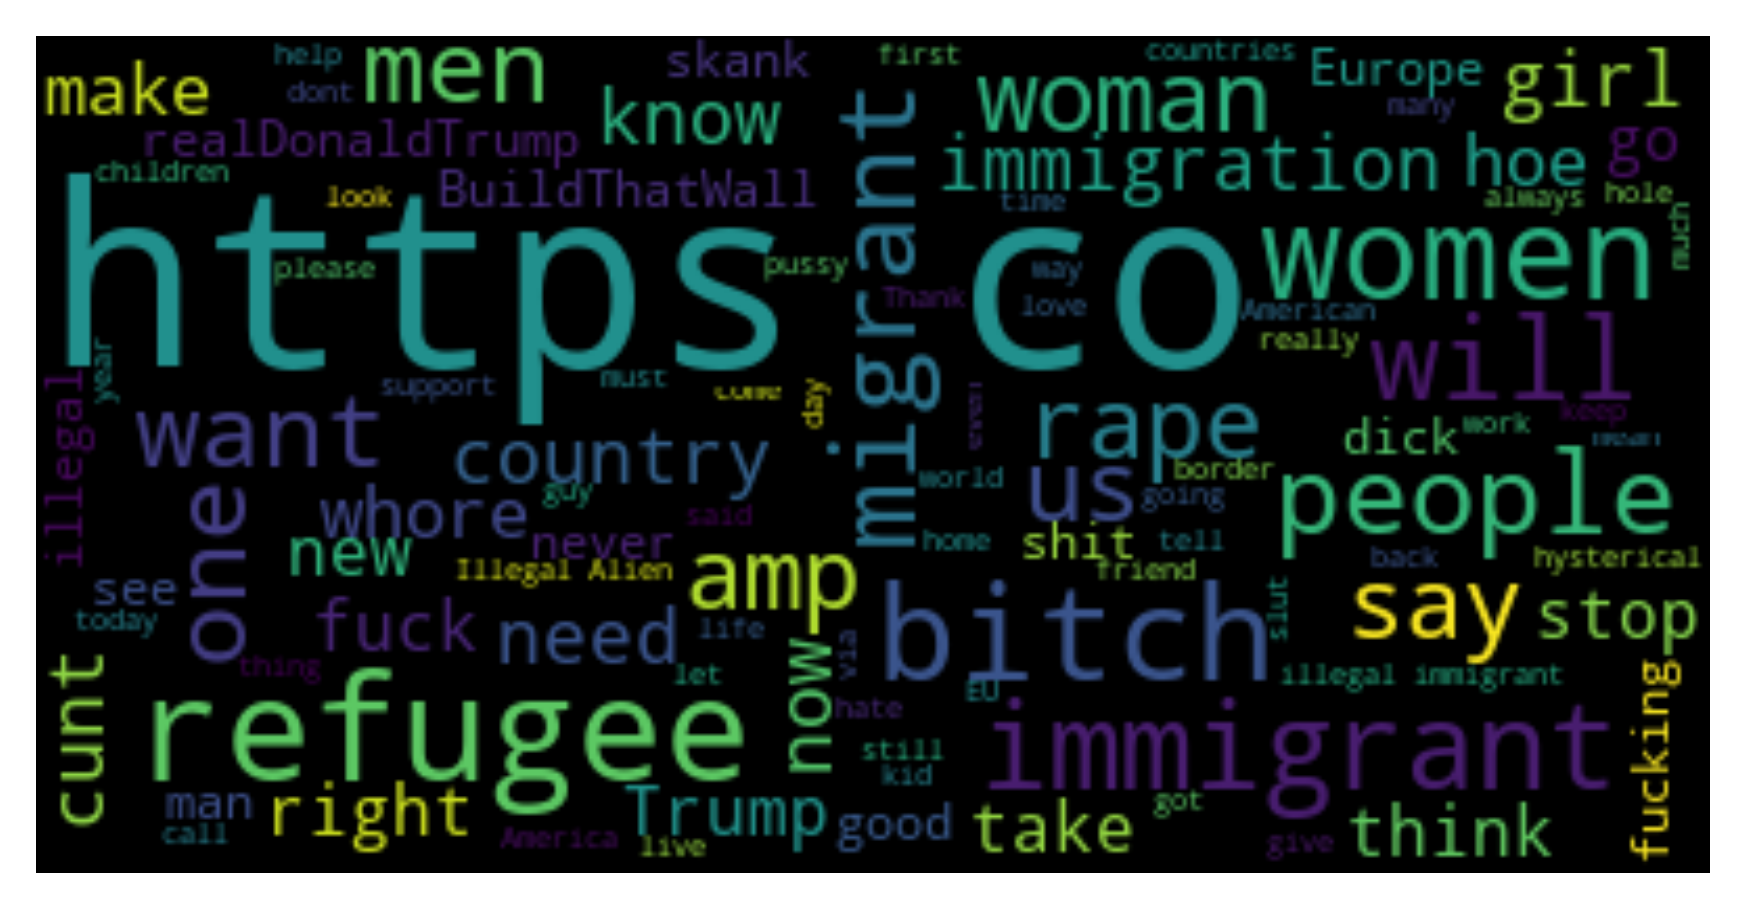

In [ ]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="black", 
                              max_words=100, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Remove punctuation:


In [ ]:
#def remove_punctuation(text):
#    no_punct=[words for words in text if words not in string.punctation]
#    words_wo_punct=''.join(no_punct)
#    return words_wo_punct
#train_en_df['text']=train_en_df['text'].apply(lambda x: remove_punctuation(x))
#news.head()


In [ ]:
# Importing Dataset in pandas dataframe
train_en_df = pd.read_csv('datasets/hateval2019_en_train.csv')
train_es_df = pd.read_csv('datasets/hateval2019_es_train.csv')
test_en_df = pd.read_csv('datasets/hateval2019_en_test.csv')
test_es_df = pd.read_csv('datasets/hateval2019_es_test.csv')
validation_en_df = pd.read_csv('datasets/hateval2019_en_dev.csv')
validation_es_df = pd.read_csv('datasets/hateval2019_es_dev.csv')


In [ ]:
train_en_df["text"]

0       Hurray, saving us $$$ in so many ways @potus @...
1       Why would young fighting age men be the vast m...
2       @KamalaHarris Illegals Dump their Kids at the ...
3       NY Times: 'Nearly All White' States Pose 'an A...
4       Orban in Brussels: European leaders are ignori...
                              ...                        
8995    @mmdwriter @JRubinBlogger @BenSasse I am proud...
8996    @CheriJacobus Hollywood is complicit in the ra...
8997    @amaziah_filani What a fucking cunt I hate see...
8998                    Hysterical woman like @CoryBooker
8999    Nearly every woman I know has #meToo in their ...
Name: text, Length: 9000, dtype: object

In [ ]:
#def replace_dollars(text):
#  tweet_replace_dollars = text.replace('$','dollars ')
#  return tweet_replace_dollars


**Replace $ by dollars:**

In [ ]:
def replace_dollars(text):
  tweet_replace_dollars = re.sub(r'\$+','dollars ', text)
  return tweet_replace_dollars


In [ ]:
# Application of the function replace_dollars 
train_en_df["text"] = train_en_df["text"].apply(lambda x: replace_dollars(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: replace_dollars(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: replace_dollars(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: replace_dollars(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: replace_dollars(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: replace_dollars(x))


In [ ]:
train_en_df["text"]

0       Hurray, saving us dollars  in so many ways @po...
1       Why would young fighting age men be the vast m...
2       @KamalaHarris Illegals Dump their Kids at the ...
3       NY Times: 'Nearly All White' States Pose 'an A...
4       Orban in Brussels: European leaders are ignori...
                              ...                        
8995    @mmdwriter @JRubinBlogger @BenSasse I am proud...
8996    @CheriJacobus Hollywood is complicit in the ra...
8997    @amaziah_filani What a fucking cunt I hate see...
8998                    Hysterical woman like @CoryBooker
8999    Nearly every woman I know has #meToo in their ...
Name: text, Length: 9000, dtype: object

**Replace € by Euros:**

In [ ]:
def replace_euros(text):
  tweet_replace_euros = re.sub(r'\€+','euros ', text)
  return tweet_replace_euros


In [ ]:
# Application of the function replace_euros 
train_en_df["text"] = train_en_df["text"].apply(lambda x: replace_euros(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: replace_euros(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: replace_euros(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: replace_euros(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: replace_euros(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: replace_euros(x))


**Replace € by pounds:**

In [ ]:
def replace_pounds(text):
  tweet_replace_pounds = re.sub(r'\£+','pounds ', text)
  return tweet_replace_pounds


In [ ]:
# Application of the function replace_pounds 
train_en_df["text"] = train_en_df["text"].apply(lambda x: replace_pounds(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: replace_pounds(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: replace_pounds(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: replace_pounds(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: replace_pounds(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: replace_pounds(x))


**Replace & by and:**

In [ ]:
def replace_ands(text):
  tweet_replace_ands = re.sub(r'\&+','and ', text)
  return tweet_replace_ands


In [ ]:
# Application of the function replace_ands 
train_en_df["text"] = train_en_df["text"].apply(lambda x: replace_ands(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: replace_ands(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: replace_ands(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: replace_ands(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: replace_ands(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: replace_ands(x))


In [ ]:
train_en_df["text"]

0       Hurray, saving us dollars  in so many ways @po...
1       Why would young fighting age men be the vast m...
2       @KamalaHarris Illegals Dump their Kids at the ...
3       NY Times: 'Nearly All White' States Pose 'an A...
4       Orban in Brussels: European leaders are ignori...
                              ...                        
8995    @mmdwriter @JRubinBlogger @BenSasse I am proud...
8996    @CheriJacobus Hollywood is complicit in the ra...
8997    @amaziah_filani What a fucking cunt I hate see...
8998                    Hysterical woman like @CoryBooker
8999    Nearly every woman I know has #meToo in their ...
Name: text, Length: 9000, dtype: object

Let's clean up the data using the re python library to use regular expressions ("RegEx"). There is a useful guide on RegEx in Python here.

First, let's replace mentions (e.g. @Dilbert_Daily) with '@USER'.

In [ ]:
# replace all the mentions (e.g. @Dilbert_Daily) 
# from the tweets with '@USER'
#tweet_string = re.sub(r'@\w+','@USER ', tweet_string)

# view the first 200 elements of the string to check 
# this worked as expected
#tweet_string[0:200]

In [ ]:
def replace_mention(text):
  tweet_english = re.sub(r'@\w+','@USER ', text)
  return tweet_english


In [ ]:
# Application of the function replace_mention 
train_en_df["text"] = train_en_df["text"].apply(lambda x: replace_mention(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: replace_mention(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: replace_mention(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: replace_mention(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: replace_mention(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: replace_mention(x))


In [ ]:
train_en_df["text"]

0       Hurray, saving us dollars  in so many ways @US...
1       Why would young fighting age men be the vast m...
2       @USER  Illegals Dump their Kids at the border ...
3       NY Times: 'Nearly All White' States Pose 'an A...
4       Orban in Brussels: European leaders are ignori...
                              ...                        
8995    @USER  @USER  @USER  I am proud to be a hyster...
8996    @USER  Hollywood is complicit in the rape and ...
8997    @USER  What a fucking cunt I hate seeing kids ...
8998                         Hysterical woman like @USER 
8999    Nearly every woman I know has #meToo in their ...
Name: text, Length: 9000, dtype: object

...then replace all URLS with '_URL'


In [ ]:
# replace all the URLs with '_URL_'
#tweet_string = re.sub(r'http\S+','_URL_ ', tweet_string)

# view the first 200 elements of the string to check 
# this worked as expected
#tweet_string[0:500]

In [ ]:
def replace_url(text):
  tweet_replace_url = re.sub(r'http\S+','_URL_ ', text)
  return tweet_replace_url


In [ ]:
# Application of the function replace_url 
train_en_df["text"] = train_en_df["text"].apply(lambda x: replace_url(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: replace_url(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: replace_url(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: replace_url(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: replace_url(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: replace_url(x))



**Remove punctuation:**

In [ ]:
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct


In [ ]:
# Application of the function remove_punctuation 
train_en_df["text"] = train_en_df["text"].apply(lambda x: remove_punctuation(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: remove_punctuation(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: remove_punctuation(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: remove_punctuation(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: remove_punctuation(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: remove_punctuation(x))


In [ ]:
train_en_df["text"].head()

0    Hurray saving us dollars  in so many ways USER...
1    Why would young fighting age men be the vast m...
2    USER  Illegals Dump their Kids at the border l...
3    NY Times Nearly All White States Pose an Array...
4    Orban in Brussels European leaders are ignorin...
Name: text, dtype: object

**Let's remove the extra spaces so there's only one space between words:**

In [ ]:
def remove_extra_space(text):
  tweet_remove_extra_space = re.sub(r'\s+',' ', text)
  return tweet_remove_extra_space


In [ ]:
# Application of the function remove_extra_space 
train_en_df["text"] = train_en_df["text"].apply(lambda x: remove_extra_space(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: remove_extra_space(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: remove_extra_space(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: remove_extra_space(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: remove_extra_space(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: remove_extra_space(x))


**Lowercase**

In [ ]:
# convert the text to lower case so, for example, instead 
# of having "Be" and "be" included
# as 2 separate words, we'd only have "be"

train_en_df["text"] = train_en_df["text"].str.lower()
test_en_df["text"] = test_en_df["text"].str.lower()
validation_en_df["text"] = validation_en_df["text"].str.lower()
#______________________________
train_es_df["text"] = train_es_df["text"].str.lower()
test_es_df["text"] = test_es_df["text"].str.lower()
validation_es_df["text"] = validation_es_df["text"].str.lower()


In [ ]:
train_en_df.head()

,id,text,HS,TR,AG
0,201,hurray saving us dollars in so many ways user ...,1,0,0
1,202,why would young fighting age men be the vast m...,1,0,0
2,203,user illegals dump their kids at the border li...,1,0,0
3,204,ny times nearly all white states pose an array...,0,0,0
4,205,orban in brussels european leaders are ignorin...,0,0,0


**Save to CSV**

In [ ]:
train_en_df.to_csv('datasets/cleaned_train_en_df.csv')
test_en_df.to_csv('datasets/cleaned_test_en_df.csv', encoding='utf-8')
validation_en_df.to_csv('datasets/cleaned_validation_en_df.csv', encoding='utf-8')

train_es_df.to_csv('datasets/cleaned_train_es_df.csv', encoding='utf-8')
test_es_df.to_csv('datasets/cleaned_test_es_df.csv', encoding='utf-8')
validation_es_df.to_csv('datasets/cleaned_validation_es_df.csv', encoding='utf-8')


In [ ]:
# Importing Dataset in pandas dataframe
train_en_df = pd.read_csv('before_tokenizer/cleaned_train_en_df.csv')
train_es_df = pd.read_csv('before_tokenizer/cleaned_train_es_df.csv')
test_en_df = pd.read_csv('before_tokenizer/cleaned_test_en_df.csv')
test_es_df = pd.read_csv('before_tokenizer/cleaned_test_es_df.csv')
validation_en_df = pd.read_csv('before_tokenizer/cleaned_validation_en_df.csv')
validation_es_df = pd.read_csv('before_tokenizer/cleaned_validation_es_df.csv')


In [ ]:
train_en_df = train_en_df.drop(labels = ['Unnamed: 0'], axis=1)
test_en_df = test_en_df.drop(labels = ['Unnamed: 0'], axis=1)
validation_en_df = validation_en_df.drop(labels = ['Unnamed: 0'], axis=1)
#
train_es_df = train_es_df.drop(labels = ['Unnamed: 0'], axis=1)
test_es_df = test_es_df.drop(labels = ['Unnamed: 0'], axis=1)
validation_es_df = validation_es_df.drop(labels = ['Unnamed: 0'], axis=1)


In [ ]:
train_en_df.head()

,id,text,HS,TR,AG
0,201,hurray saving us dollars in so many ways user ...,1,0,0
1,202,why would young fighting age men be the vast m...,1,0,0
2,203,user illegals dump their kids at the border li...,1,0,0
3,204,ny times nearly all white states pose an array...,0,0,0
4,205,orban in brussels european leaders are ignorin...,0,0,0


**CountVectorizer**

CountVectorizer works on Terms Frequency, i.e. counting the occurrences of tokens and building a sparse matrix of documents x tokens.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()


In [ ]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7f242bbdf4e0>>,
                vocabulary=None)

In [ ]:
# import and instantiate TfidfVectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7f242ab070b8>>,
                use_idf=True, vocabulary=None)

In [ ]:
train_en_df.head()

,Unnamed: 0,id,text,HS,TR,AG
0,0,201,hurray saving us dollars in so many ways user ...,1,0,0
1,1,202,why would young fighting age men be the vast m...,1,0,0
2,2,203,user illegals dump their kids at the border li...,1,0,0
3,3,204,ny times nearly all white states pose an array...,0,0,0
4,4,205,orban in brussels european leaders are ignorin...,0,0,0


In [ ]:
train_en_df.shape

(9000, 6)

**Instance Tokenize:**

In [ ]:
# Not in use
#tokenizer = RegexpTokenizer('r\w+')

In [ ]:
def doc_tokenize(text):
    split_text=re.split("\W+",text) 
    return split_text
#news['title_wo_punct_split']=news['title_wo_punct'].apply(lambda x: tokenize(x.lower()))
#news.head()

In [ ]:
# Application of the tokenization 
train_en_df["text"] = train_en_df["text"].apply(lambda x: doc_tokenize(x.lower()))
test_en_df["text"] = test_en_df["text"].apply(lambda x: doc_tokenize(x.lower()))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: doc_tokenize(x.lower()))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: doc_tokenize(x.lower()))
test_es_df["text"] = test_es_df["text"].apply(lambda x: doc_tokenize(x.lower()))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: doc_tokenize(x.lower()))


In [ ]:
train_en_df["text"]

0       [hurray, saving, us, dollars, in, so, many, wa...
1       [why, would, young, fighting, age, men, be, th...
2       [user, illegals, dump, their, kids, at, the, b...
3       [ny, times, nearly, all, white, states, pose, ...
4       [orban, in, brussels, european, leaders, are, ...
                              ...                        
8995    [user, user, user, i, am, proud, to, be, a, hy...
8996    [user, hollywood, is, complicit, in, the, rape...
8997    [user, what, a, fucking, cunt, i, hate, seeing...
8998                    [hysterical, woman, like, user, ]
8999    [nearly, every, woman, i, know, has, metoo, in...
Name: text, Length: 9000, dtype: object

**Remove stop words:**

In [ ]:
nltk.download('stopwords')
def remove_topwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Application of the function remove_topwords 
train_en_df["text"] = train_en_df["text"].apply(lambda x: remove_topwords(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: remove_topwords(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: remove_topwords(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: remove_topwords(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: remove_topwords(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: remove_topwords(x))


In [ ]:
train_en_df["text"]

0       [hurray, saving, us, dollars, many, ways, user...
1       [would, young, fighting, age, men, vast, major...
2       [user, illegals, dump, kids, border, like, roa...
3       [ny, times, nearly, white, states, pose, array...
4       [orban, brussels, european, leaders, ignoring,...
                              ...                        
8995       [user, user, user, proud, hysterical, woman, ]
8996    [user, hollywood, complicit, rape, sexual, ass...
8997    [user, fucking, cunt, hate, seeing, kids, gett...
8998                    [hysterical, woman, like, user, ]
8999    [nearly, every, woman, know, metoo, feed, sexu...
Name: text, Length: 9000, dtype: object

**Stemming & Lemmatizing:**


**Lemmanizer**

In [ ]:
nltk.download('wordnet')
# Instantiate lemmatizer

lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
  lem_text = [lemmatizer.lemmatize(i) for i in text]
  return lem_text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
train_en_df.head()

,Unnamed: 0,id,text,HS,TR,AG
0,0,201,"['hurray', 'saving', 'us', 'dollars', 'many', ...",1,0,0
1,1,202,"['would', 'young', 'fighting', 'age', 'men', '...",1,0,0
2,2,203,"['user', 'illegals', 'dump', 'kids', 'border',...",1,0,0
3,3,204,"['ny', 'times', 'nearly', 'white', 'states', '...",0,0,0
4,4,205,"['orban', 'brussels', 'european', 'leaders', '...",0,0,0


In [ ]:
# Application of the function word_lemmanizer 
train_en_df["text"] = train_en_df["text"].apply(lambda x: word_lemmatizer(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: word_lemmatizer(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: word_lemmatizer(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: word_lemmatizer(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: word_lemmatizer(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: word_lemmatizer(x))


In [ ]:
train_en_df['text'].head()

0    [[, ', h, u, r, r, a, y, ', ,,  , ', s, a, v, ...
1    [[, ', w, o, u, l, d, ', ,,  , ', y, o, u, n, ...
2    [[, ', u, s, e, r, ', ,,  , ', i, l, l, e, g, ...
3    [[, ', n, y, ', ,,  , ', t, i, m, e, s, ', ,, ...
4    [[, ', o, r, b, a, n, ', ,,  , ', b, r, u, s, ...
Name: text, dtype: object

**Steamming**

In [ ]:
# Instantiate Stemmer
stemmer = PorterStemmer()
def word_stemmer(text):
  stem_text = " ".join([stemmer.stem(i) for i in text])
  return stem_text


In [ ]:
# Application of the function word_stemmer 
train_en_df["text"] = train_en_df["text"].apply(lambda x: word_stemmer(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: word_stemmer(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: word_stemmer(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: word_stemmer(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: word_stemmer(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: word_stemmer(x))


In [ ]:
train_en_df["text"].head()

0    hurray save us dollar mani way user user lockt...
1    would young fight age men vast major one escap...
2    user illeg dump kid border like road kill refu...
3    ny time nearli white state pose array problem ...
4    orban brussel european leader ignor peopl want...
Name: text, dtype: object

...then convert the text to lower case so, for example, instead of having "Be" and "be" included as 2 separate words, we only have "be":


In [ ]:
# convert the text to lower case so, for example, instead 
# of having "Be" and "be" included
# as 2 separate words, we'd only have "be"
#tweet_string = tweet_string.lower()

# view the first 200 elements of the string to check 
# this worked as expected
#tweet_string[0:500]

In [ ]:
# convert the text to lower case so, for example, instead 
# of having "Be" and "be" included
# as 2 separate words, we'd only have "be"

train_en_df["text"] = train_en_df["text"].str.lower()
test_en_df["text"] = test_en_df["text"].str.lower()
validation_en_df["text"] = validation_en_df["text"].str.lower()
#______________________________
train_es_df["text"] = train_es_df["text"].str.lower()
test_es_df["text"] = test_es_df["text"].str.lower()
validation_es_df["text"] = validation_es_df["text"].str.lower()


In [ ]:
train_en_df["text"].head()

0    hurray, saving us $$$ in so many ways @user  @...
1    why would young fighting age men be the vast m...
2    @user  illegals dump their kids at the border ...
3    ny times: 'nearly all white' states pose 'an a...
4    orban in brussels: european leaders are ignori...
Name: text, dtype: object

Let's remove the extra spaces so there's only one space between words:


In [ ]:
# remove extra white spaces so there is only one 
# space between words
#tweet_string = re.sub(r'\s+',' ', tweet_string)

# view the first 200 elements of the string to 
# check this worked as expected
#tweet_string[0:500]

In [ ]:
def remove_extra_space(text):
  tweet_remove_extra_space = re.sub(r'\s+',' ', text)
  return tweet_remove_extra_space


In [ ]:
# Application of the function remove_extra_space 
train_en_df["text"] = train_en_df["text"].apply(lambda x: remove_extra_space(x))
test_en_df["text"] = test_en_df["text"].apply(lambda x: remove_extra_space(x))
validation_en_df["text"] = validation_en_df["text"].apply(lambda x: remove_extra_space(x))
#______________________________
train_es_df["text"] = train_es_df["text"].apply(lambda x: remove_extra_space(x))
test_es_df["text"] = test_es_df["text"].apply(lambda x: remove_extra_space(x))
validation_es_df["text"] = validation_es_df["text"].apply(lambda x: remove_extra_space(x))


In [ ]:
train_en_df["text"].head()

0    hurray save us dollar mani way user user lockt...
1    would young fight age men vast major one escap...
2    user illeg dump kid border like road kill refu...
3    ny time nearli white state pose array problem ...
4    orban brussel european leader ignor peopl want...
Name: text, dtype: object

In [ ]:
train_en_df.to_csv('clean/train_en_df.csv')
test_en_df.to_csv('clean/test_en_df.csv', encoding='utf-8')
validation_en_df.to_csv('clean/validation_en_df.csv', encoding='utf-8')

train_es_df.to_csv('clean/train_es_df.csv', encoding='utf-8')
test_es_df.to_csv('clean/test_es_df.csv', encoding='utf-8')
validation_es_df.to_csv('clean/validation_es_df.csv', encoding='utf-8')


Let's view the wordcloud for this cleaned-up string:


In [ ]:
# create a single string containing all the tweets, 
# as this will be needed to be able to create a wordcloud
tweet_en_string = " ".join(tweet for tweet in train_en_df["text"])

# view the first 200 elements of the string to check 
# this worked as expected
tweet_en_string[0:200]

'hurray save us dollar mani way user user lockthemup buildthewal enddaca boycottnfl boycottnik would young fight age men vast major one escap war amp cannot fight like women children elderlyit major re'

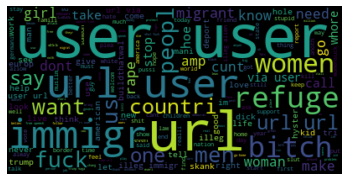

In [ ]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="black", 
                              max_words=200, 
                             ).generate(tweet_en_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let's change it so that the wordcloud only shows the top 25 words:


Next, let's **tokenise** the string i.e. split the string into separate tokens (i.e. separate elements in a collection) using spacy. In this example, each token will be a word. This isn't the only option used in NLP. We could choose tokens to be individual characters, parts of words, 2 words (known as 2-grams/bi-grams), 3 words (3-grams/tri-grams), 4 words (4-grams), sentences... But for this example each token will be a word.

In [ ]:
#pip install nltk

In [ ]:
#df1.append(df4, ignore_index=True, sort=False)

frames_en_1 = train_en_df.append(test_en_df)
frames_en_2 = frames_1.append(validation_en_df)
frames_en = frames_en_2
frames_en.describe()

,id,HS,TR,AG
count,13000.000000,13000.000000,13000.000000,13000.000000
mean,12144.251769,0.420769,0.160692,0.181308
std,11850.013393,0.493702,0.367261,0.385288
min,201.000000,0.000000,0.000000,0.000000
25%,3450.750000,0.000000,0.000000,0.000000
50%,6700.500000,0.000000,0.000000,0.000000
75%,18950.250000,1.000000,0.000000,0.000000
max,34597.000000,1.000000,1.000000,1.000000


In [ ]:
frames

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0
...,...,...,...,...,...
995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,0,0
996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1,1,1
997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0,0,0
998,19199,I hate bitches who talk about niggaz with kids...,1,0,1


In [ ]:
frames_es_1 = train_es_df.append(test_es_df)
frames_es_2 = frames_es_1.append(validation_es_df)
frames_es = frames_es_2
frames_es.describe()

,id,HS,TR,AG
count,6600.000000,6600.000000,6600.000000,6600.000000
mean,24880.988939,0.415000,0.255909,0.326061
std,4440.414205,0.492759,0.436404,0.468805
min,20001.000000,0.000000,0.000000,0.000000
25%,21650.750000,0.000000,0.000000,0.000000
50%,23300.500000,0.000000,0.000000,0.000000
75%,24950.250000,1.000000,1.000000,1.000000
max,34600.000000,1.000000,1.000000,1.000000


In [ ]:
frames_es.describe()

,id,HS,TR,AG
count,6600.000000,6600.000000,6600.000000,6600.000000
mean,24880.988939,0.415000,0.255909,0.326061
std,4440.414205,0.492759,0.436404,0.468805
min,20001.000000,0.000000,0.000000,0.000000
25%,21650.750000,0.000000,0.000000,0.000000
50%,23300.500000,0.000000,0.000000,0.000000
75%,24950.250000,1.000000,1.000000,1.000000
max,34600.000000,1.000000,1.000000,1.000000


### 1. Exploratory Data Analysis

**1.1. Let us get more information about the training data**

In [ ]:
#
train_en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9000 non-null   int64 
 1   text    9000 non-null   object
 2   HS      9000 non-null   int64 
 3   TR      9000 non-null   int64 
 4   AG      9000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 351.7+ KB


In [ ]:
train_en_df.describe()

,Unnamed: 0,id,HS,TR,AG
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4499.500000,4700.500000,0.420333,0.149000,0.173222
std,2598.220545,2598.220545,0.493640,0.356108,0.378460
min,0.000000,201.000000,0.000000,0.000000,0.000000
25%,2249.750000,2450.750000,0.000000,0.000000,0.000000
50%,4499.500000,4700.500000,0.000000,0.000000,0.000000
75%,6749.250000,6950.250000,1.000000,0.000000,0.000000
max,8999.000000,9200.000000,1.000000,1.000000,1.000000


In [ ]:
train_es_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4500 non-null   int64 
 1   text    4500 non-null   object
 2   HS      4500 non-null   int64 
 3   TR      4500 non-null   int64 
 4   AG      4500 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 175.9+ KB


In [ ]:
test_en_df.describe()

,id,HS,TR,AG
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,32290.091000,0.420000,0.176333,0.198000
std,1328.001665,0.493641,0.381167,0.398559
min,30001.000000,0.000000,0.000000,0.000000
25%,31146.000000,0.000000,0.000000,0.000000
50%,32280.500000,0.000000,0.000000,0.000000
75%,33426.250000,1.000000,0.000000,0.000000
max,34597.000000,1.000000,1.000000,1.000000


In [ ]:
test_en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   int64 
 1   text    3000 non-null   object
 2   HS      3000 non-null   int64 
 3   TR      3000 non-null   int64 
 4   AG      3000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.3+ KB


In [ ]:
validation_en_df.describe()

,id,HS,TR,AG
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,18700.500000,0.42700,0.219000,0.204000
std,288.819436,0.49489,0.413776,0.403171
min,18201.000000,0.00000,0.000000,0.000000
25%,18450.750000,0.00000,0.000000,0.000000
50%,18700.500000,0.00000,0.000000,0.000000
75%,18950.250000,1.00000,0.000000,0.000000
max,19200.000000,1.00000,1.000000,1.000000


In [ ]:
test_es_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1600 non-null   int64 
 1   text    1600 non-null   object
 2   HS      1600 non-null   int64 
 3   TR      1600 non-null   int64 
 4   AG      1600 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 62.6+ KB


In [ ]:
validation_en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   text    1000 non-null   object
 2   HS      1000 non-null   int64 
 3   TR      1000 non-null   int64 
 4   AG      1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
validation_es_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    int64 
 1   text    500 non-null    object
 2   HS      500 non-null    int64 
 3   TR      500 non-null    int64 
 4   AG      500 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


In [ ]:
train_en_df.head()


,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [ ]:
train_en_df.text[0]

'Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike'

In [ ]:
train_es_df.head()

,id,text,HS,TR,AG
0,20001,Easyjet quiere duplicar el número de mujeres p...,1,0,0
1,20002,El gobierno debe crear un control estricto de ...,1,0,0
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0,0,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0,0,0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0,0,0


In [ ]:
validation_en_df.head()

,id,text,HS,TR,AG
0,18201,I swear I’m getting to places just in the nick...,0,0,0
1,18202,I’m an immigrant — and Trump is right on immig...,0,0,0
2,18203,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,0,1
3,18204,@DRUDGE_REPORT We have our own invasion issues...,1,0,1
4,18205,Worker Charged With Sexually Molesting Eight C...,0,0,0


In [ ]:
test_es_df.head()

,id,text,HS,TR,AG
0,31494,@jlmanavasques Tu eres un hijo de la gran puta,0,0,0
1,32461,#EnCampañaM4 Y ellos que llevan humillando al ...,0,0,0
2,33228,@Barbijaputa Tú sí q das vergüenza diciendo q ...,0,0,0
3,31699,"Vieja de mierda, te mereces todo lo que esta m...",1,1,1
4,33806,"@KarenB612 @SebaCaro8 Puta guede ql, callate p...",1,1,1


In [ ]:
validation_en_df.head()

,id,text,HS,TR,AG
0,18201,I swear I’m getting to places just in the nick...,0,0,0
1,18202,I’m an immigrant — and Trump is right on immig...,0,0,0
2,18203,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,0,1
3,18204,@DRUDGE_REPORT We have our own invasion issues...,1,0,1
4,18205,Worker Charged With Sexually Molesting Eight C...,0,0,0


In [ ]:
validation_es_df.head()

,id,text,HS,TR,AG
0,20005,Me estoy comiendo la picada árabe más rica de ...,0,0,0
1,20006,@Haryachyzaychyk Callate zorra y mama duro! 😍,1,1,1
2,20011,Acabo de escuchar a Casado diciendo que hay DE...,0,0,0
3,20019,"""Y NADIE SE HA PREGUNTADO LO QUE LE VA A COSTA...",1,0,1
4,20033,"@Fed_Durand Callate come sobra, más zorra son ...",1,1,1


### Handling Numerical variables

In [ ]:
#
num_attributes = train_en_df.select_dtypes(include=['int'])
print(num_attributes.columns)

Index(['id', 'HS', 'TR', 'AG'], dtype='object')


### Summary statistics on numerical data

In [ ]:
train_en_df.describe()

,id,HS,TR,AG
count,9000.000000,9000.000000,9000.000000,9000.000000
mean,4700.500000,0.420333,0.149000,0.173222
std,2598.220545,0.493640,0.356108,0.378460
min,201.000000,0.000000,0.000000,0.000000
25%,2450.750000,0.000000,0.000000,0.000000
50%,4700.500000,0.000000,0.000000,0.000000
75%,6950.250000,1.000000,0.000000,0.000000
max,9200.000000,1.000000,1.000000,1.000000


## 1.2. Text Visualisation

In [ ]:
# if not yet downloaded
#pip install nltk

In [ ]:
#import nltk
#nltk.download('punkt')

###1.2.1. Tokenization 

This will help to visualise text data

Ther helpful visualization tool wordcloud package helps to create word clouds by placing words on a canvas randomly, with sizes proportional to their frequency in the text.

### Text Visualisation: Train set for English

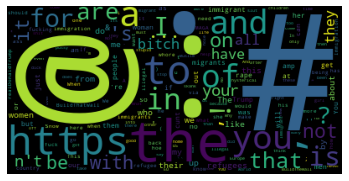

In [ ]:

frequency_dist_train_en = nltk.FreqDist(tokens_train_en)
sorted(frequency_dist_train_en,key=frequency_dist_train_en.__getitem__, reverse=True)[0:50]
#
wordcloud_train_en = WordCloud().generate_from_frequencies(frequency_dist_train_en)
plt.imshow(wordcloud_train_en)
plt.axis("off")
plt.show()

### 1. Text Visualisation: Validation set for English

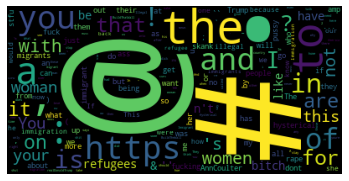

In [ ]:
frequency_dist_validation_en = nltk.FreqDist(tokens_validation_en)
sorted(frequency_dist_validation_en,key=frequency_dist_validation_en.__getitem__, reverse=True)[0:50]
#
wordcloud_validation_en = WordCloud().generate_from_frequencies(frequency_dist_validation_en)
plt.imshow(wordcloud_validation_en)
plt.axis("off")
plt.show()

### Text Visualisation: Train set for Spanish

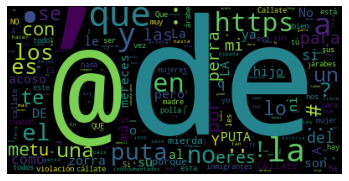

In [ ]:
frequency_dist_train_es = nltk.FreqDist(tokens_train_es)
sorted(frequency_dist_train_es,key=frequency_dist_train_es.__getitem__, reverse=True)[0:50]
#
wordcloud_train_es = WordCloud().generate_from_frequencies(frequency_dist_train_es)
plt.imshow(wordcloud_train_es)
plt.axis("off")
plt.show()

### Text Visualisation: Validation set for Spanish

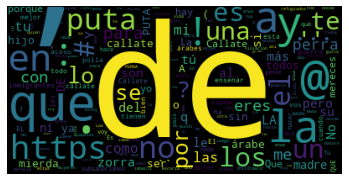

In [ ]:
frequency_dist_validation_es = nltk.FreqDist(tokens_validation_es)
sorted(frequency_dist_validation_es,key=frequency_dist_validation_es.__getitem__, reverse=True)[0:50]
#
wordcloud_validation_es = WordCloud().generate_from_frequencies(frequency_dist_validation_es)
plt.imshow(wordcloud_validation_es)
plt.axis("off")
plt.show()

#1.3. Preprocessing

**We first convert the comments to lower-case and then use custom made functions to remove html-tags, punctuation and non-alphabetic characters from the comments.**

We 


In [ ]:

X_train_en = train_en_df.text
y_train_en = train_en_df.HS
X_test_en = test_en_df.text
y_test_en = test_en_df.HS
#
X_train_es = train_es_df.text
y_train_es = train_es_df.HS
X_test_es = test_es_df.text
y_test_es = test_es_df.HS
# validation_en_df
X_validation_en = validation_en_df.text
y_validation_en = validation_en_df.HS
X_validation_es = validation_es_df.text
y_validation_es = validation_es_df.HS


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

## Before training...

Define X and y from the DataFrame, using the text as the only feature and the HS as the response.
Hint: we will keep in mind that X should be a pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the task that follows.
Also, we will use data in English then in Spanish.

In [ ]:
y_train_en_ess = train_en_df.drop(labels = ['id','text'], axis=1)
y_train_en_ess.head()

,HS,TR,AG
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [ ]:
y_train_en_ess = train_en_df[['HS','TR', 'AG']]
y_train_en_ess.head()

,HS,TR,AG
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [ ]:
X_train_en = train_en_df.text
y_train_en = train_en_df[['HS', 'TR', 'AG']]
#
X_test_en = test_en_df.text
y_test_en = test_en_df[['HS', 'TR', 'AG']]
#
X_validation_en = validation_en_df.text
y_validation_en = validation_en_df[['HS', 'TR', 'AG']]
#--------------------------------------------------------------------------
X_train_es = train_es_df.text
y_train_es = train_es_df[['HS', 'TR', 'AG']]
#
X_test_es = test_es_df.text
y_test_es = test_es_df[['HS', 'TR', 'AG']]
#
X_validation_es = validation_es_df.text
y_validation_es = validation_es_df[['HS', 'TR', 'AG']]


In [ ]:
X_train_en = train_en_df.text
y_train_en = train_en_df.HS
X_test_en = test_en_df.text
y_test_en = test_en_df.HS
#
X_train_es = train_es_df.text
y_train_es = train_es_df.HS
X_test_es = test_es_df.text
y_test_es = test_es_df.HS
# validation_en_df
X_validation_en = validation_en_df.text
y_validation_en = validation_en_df.HS
X_validation_es = validation_es_df.text
y_validation_es = validation_es_df.HS


In [ ]:
X_train_en.head()

0    hurray save us dollar mani way user user lockt...
1    would young fight age men vast major one escap...
2    user illeg dump kid border like road kill refu...
3    ny time nearli white state pose array problem ...
4    orban brussel european leader ignor peopl want...
Name: text, dtype: object

###2. Use CountVectorizer to create document-term matrices from train and test

This code will tokenise the text and create document-term matrices from train and validation data.

In [ ]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:

# fit and transform X_train_en into X_train_en_dtm
# tokenize and build vocab and encode X_train_en
X_train_en_dtm = vect.fit_transform(X_train_en)
# encode X_validation_en
X_test_en_dtm = vect.transform(X_test_en)

X_validation_en_dtm = vect.transform(X_validation_en)
#
# fit and transform X_train_es into X_train_es_dtm
X_train_es_dtm = vect.fit_transform(X_train_es)
X_validation_es_dtm = vect.transform(X_validation_es)

print(X_train_en_dtm.shape, X_validation_en_dtm.shape)
print(X_train_es_dtm.shape, X_validation_es_dtm.shape)


(9000, 14124) (1000, 14124)
(4500, 13034) (500, 13034)


In [ ]:
categories = list(train_en_df.columns.values)
categories

['id', 'text', 'HS', 'TR', 'AG']

In [ ]:
categories = ['HS', 'TR', 'AG']
categories

['HS', 'TR', 'AG']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train_en_dtm, train_en_df[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_validation_en_dtm)
    print('Test accuracy is {}'.format(accuracy_score(validation_en_df[category], prediction)))
    print("\n")

**Processing HS comments...**
Test accuracy is 0.712


**Processing TR comments...**
Test accuracy is 0.835


**Processing AG comments...**
Test accuracy is 0.793




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999))),
            ])
for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train_en_dtm, train_en_df[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test_en_dtm)
    print('Test accuracy is {}'.format(accuracy_score(test_en_df[category], prediction)))
    print("\n")
    

**Processing HS comments...**
Test accuracy is 0.5116666666666667


**Processing TR comments...**
Test accuracy is 0.8026666666666666


**Processing AG comments...**
Test accuracy is 0.692




##2.1. Training on English data

Here we train 5 classification models (KNN, Multinomial NB, Logistic, Linear SVM, Non-Linear SVM) into one loop for English data set:

In [ ]:
#categories = list(train_en_df.columns.values)
#categories
#categories = ['HS', 'TR', 'AG']
#categories

['HS', 'TR', 'AG']

In [ ]:
#pip install scikit-multilearn


In [ ]:
classifiers_en = [neighbors.KNeighborsClassifier(n_neighbors=100),
#               naive_bayes.GaussianNB(),
               naive_bayes.MultinomialNB(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999),
               svm.LinearSVC(max_iter=999999),
               svm.SVC(kernel='rbf', gamma='auto', max_iter=999999)]

classifier_en_names = ['KNN','Multinomial NB','Logistic','Linear SVM','Non-Linear SVM']

accuracies_en = []
for clf_en, name_en in zip(classifiers_en,classifier_en_names):
    clf_en.fit(X_train_en_dtm, y_train_en)
    #clf_en.fit(X_train_en_dtm, y_t)

    predictions_en = clf_en.predict(X_validation_en_dtm)
    #acc_en = metrics.accuracy_score(predictions_en, y_validation_en)
    acc_en = metrics.accuracy_score(y_validation_en, predictions_en)

    accuracies_en.append(acc_en)
models_en = pd.DataFrame({'Model using English Data':classifier_en_names, 'Accuracy':accuracies_en})    
models_en

,Model using English Data,Accuracy
0,KNN,0.697
1,Multinomial NB,0.740
2,Logistic,0.728
3,Linear SVM,0.724
4,Non-Linear SVM,0.573


### Evaluation

**As seen, Multinomial NB achieved an accuracy of 74.1%, which is the highest, so let's evaluating using Multinomial NB result.**

In [ ]:

# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

#linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=9999),
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[473 100]
 [160 267]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.78       573
           1       0.73      0.63      0.67       427

    accuracy                           0.74      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.74      0.74      1000

0.74


In [ ]:

# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[476  97]
 [206 221]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       573
           1       0.69      0.52      0.59       427

    accuracy                           0.70      1000
   macro avg       0.70      0.67      0.68      1000
weighted avg       0.70      0.70      0.69      1000

0.697


In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[442 131]
 [141 286]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       573
           1       0.69      0.67      0.68       427

    accuracy                           0.73      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.73      0.73      0.73      1000

0.728


In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[419 154]
 [122 305]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       573
           1       0.66      0.71      0.69       427

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.73      0.72      0.73      1000

0.724


In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[459 114]
 [206 221]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       573
           1       0.66      0.52      0.58       427

    accuracy                           0.68      1000
   macro avg       0.67      0.66      0.66      1000
weighted avg       0.68      0.68      0.67      1000

0.68


# **Detecting on TR**

In [ ]:
#X_train_en = train_en_df.text
y_train_en = train_en_df.TR
y_test_en = test_en_df.TR
y_validation_en = validation_en_df.TR


In [ ]:
classifiers_en = [neighbors.KNeighborsClassifier(n_neighbors=100),
#               naive_bayes.GaussianNB(),
               naive_bayes.MultinomialNB(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999),
               svm.LinearSVC(max_iter=999999),
               svm.SVC(kernel='rbf', gamma='auto', max_iter=999999)]

classifier_en_names = ['KNN','Multinomial NB','Logistic','Linear SVM','Non-Linear SVM']

accuracies_en = []
for clf_en, name_en in zip(classifiers_en,classifier_en_names):
    clf_en.fit(X_train_en_dtm, y_train_en)
    #clf_en.fit(X_train_en_dtm, y_t)

    predictions_en = clf_en.predict(X_validation_en_dtm)
    #acc_en = metrics.accuracy_score(predictions_en, y_validation_en)
    acc_en = metrics.accuracy_score(y_validation_en, predictions_en)

    accuracies_en.append(acc_en)
models_en = pd.DataFrame({'Model using English Data':classifier_en_names, 'Accuracy':accuracies_en})    
models_en

,Model using English Data,Accuracy
0,KNN,0.817
1,Multinomial NB,0.808
2,Logistic,0.836
3,Linear SVM,0.852
4,Non-Linear SVM,0.781


# **Detecting on HS**

In [ ]:

# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[774   7]
 [185  34]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       781
           1       0.83      0.16      0.26       219

    accuracy                           0.81      1000
   macro avg       0.82      0.57      0.58      1000
weighted avg       0.81      0.81      0.75      1000

0.808


In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[764  17]
 [166  53]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       781
           1       0.76      0.24      0.37       219

    accuracy                           0.82      1000
   macro avg       0.79      0.61      0.63      1000
weighted avg       0.81      0.82      0.78      1000

0.817


In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[748  33]
 [131  88]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       781
           1       0.73      0.40      0.52       219

    accuracy                           0.84      1000
   macro avg       0.79      0.68      0.71      1000
weighted avg       0.82      0.84      0.82      1000

0.836


In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[730  51]
 [ 97 122]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       781
           1       0.71      0.56      0.62       219

    accuracy                           0.85      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.84      0.85      0.85      1000

0.852


In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[736  45]
 [127  92]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       781
           1       0.67      0.42      0.52       219

    accuracy                           0.83      1000
   macro avg       0.76      0.68      0.71      1000
weighted avg       0.81      0.83      0.81      1000

0.828


# **Detecting on AG**

In [ ]:
#X_train_en = train_en_df.text
y_train_en = train_en_df.AG
y_test_en = test_en_df.AG
y_validation_en = validation_en_df.AG


In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[784  12]
 [191  13]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.89       796
           1       0.52      0.06      0.11       204

    accuracy                           0.80      1000
   macro avg       0.66      0.52      0.50      1000
weighted avg       0.75      0.80      0.73      1000

0.797


In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[770  26]
 [157  47]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       796
           1       0.64      0.23      0.34       204

    accuracy                           0.82      1000
   macro avg       0.74      0.60      0.62      1000
weighted avg       0.79      0.82      0.78      1000

0.817


In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[710  86]
 [112  92]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       796
           1       0.52      0.45      0.48       204

    accuracy                           0.80      1000
   macro avg       0.69      0.67      0.68      1000
weighted avg       0.79      0.80      0.80      1000

0.802


In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[761  35]
 [167  37]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       796
           1       0.51      0.18      0.27       204

    accuracy                           0.80      1000
   macro avg       0.67      0.57      0.58      1000
weighted avg       0.76      0.80      0.76      1000

0.798


### 2.2. Traing on Spanish Data

In [ ]:
X_train_en = train_en_df.text
y_train_en = train_en_df.HS
X_test_en = test_en_df.text
y_test_en = test_en_df.HS
#
X_train_es = train_es_df.text
y_train_es = train_es_df.HS
X_test_es = test_es_df.text
y_test_es = test_es_df.HS
# validation_en_df
X_validation_en = validation_en_df.text
y_validation_en = validation_en_df.HS
X_validation_es = validation_es_df.text
y_validation_es = validation_es_df.HS


In [ ]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
#
X_train_es_dtm = vect.fit_transform(X_train_es)
X_test_es_dtm = vect.transform(X_test_es)
X_validation_es_dtm = vect.transform(X_validation_es)

print(X_train_es_dtm.shape, X_validation_es_dtm.shape)
print(X_train_es_dtm.shape, X_validation_es_dtm.shape)


(4500, 13034) (500, 13034)
(4500, 13034) (500, 13034)


**Let's to the same for Spanish data set.**

In [ ]:
classifiers_en = [neighbors.KNeighborsClassifier(n_neighbors=100),
#               naive_bayes.GaussianNB(),
               naive_bayes.MultinomialNB(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999),
               svm.LinearSVC(max_iter=999999),
               svm.SVC(kernel='rbf', gamma='auto', max_iter=999999)]

classifier_en_names = ['KNN','Multinomial NB','Logistic','Linear SVM','Non-Linear SVM']

accuracies_en = []
for clf_en, name_en in zip(classifiers_en,classifier_en_names):
    clf_en.fit(X_train_es_dtm, y_train_es)
    #clf_en.fit(X_train_en_dtm, y_t)

    predictions_en = clf_en.predict(X_validation_es_dtm)
    #acc_en = metrics.accuracy_score(predictions_en, y_validation_en)
    acc_en = metrics.accuracy_score(y_validation_es, predictions_en)

    accuracies_en.append(acc_en)
models_en = pd.DataFrame({'Model using Spanish Data':classifier_en_names, 'Accuracy':accuracies_en})    
models_en

,Model using English Data,Accuracy
0,KNN,0.592
1,Multinomial NB,0.766
2,Logistic,0.784
3,Linear SVM,0.756
4,Non-Linear SVM,0.556


### Evaluation

As seen, Logistic achieved an accuracy of 77%, which is the highest, so **let's do evaluation** using Logistic result.

In [ ]:
# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[240  38]
 [ 79 143]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       278
           1       0.79      0.64      0.71       222

    accuracy                           0.77       500
   macro avg       0.77      0.75      0.76       500
weighted avg       0.77      0.77      0.76       500

0.766


In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[169 109]
 [ 95 127]]
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       278
           1       0.54      0.57      0.55       222

    accuracy                           0.59       500
   macro avg       0.59      0.59      0.59       500
weighted avg       0.59      0.59      0.59       500

0.592


In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[228  50]
 [ 58 164]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       278
           1       0.77      0.74      0.75       222

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500

0.784


In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[216  62]
 [ 60 162]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       278
           1       0.72      0.73      0.73       222

    accuracy                           0.76       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.76      0.76       500

0.756


In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[215  63]
 [ 81 141]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       278
           1       0.69      0.64      0.66       222

    accuracy                           0.71       500
   macro avg       0.71      0.70      0.71       500
weighted avg       0.71      0.71      0.71       500

0.712


# **Detecting on TR**

In [ ]:
y_train_es = train_es_df.TR
y_test_es = test_es_df.TR
y_validation_es = validation_es_df.TR


In [ ]:
# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[342  21]
 [ 52  85]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       363
           1       0.80      0.62      0.70       137

    accuracy                           0.85       500
   macro avg       0.83      0.78      0.80       500
weighted avg       0.85      0.85      0.85       500

0.854


In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[269  94]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       363
           1       0.53      0.78      0.63       137

    accuracy                           0.75       500
   macro avg       0.72      0.76      0.72       500
weighted avg       0.80      0.75      0.76       500

0.752


In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[336  27]
 [ 33 104]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       363
           1       0.79      0.76      0.78       137

    accuracy                           0.88       500
   macro avg       0.85      0.84      0.85       500
weighted avg       0.88      0.88      0.88       500

0.88


In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[331  32]
 [ 31 106]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       363
           1       0.77      0.77      0.77       137

    accuracy                           0.87       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.87      0.87      0.87       500

0.874


In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[314  49]
 [ 39  98]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       363
           1       0.67      0.72      0.69       137

    accuracy                           0.82       500
   macro avg       0.78      0.79      0.78       500
weighted avg       0.83      0.82      0.83       500

0.824


# **Detecting on AG**

In [ ]:
y_train_es = train_es_df.AG
y_test_es = test_es_df.AG
y_validation_es = validation_es_df.AG


In [ ]:
# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[294  30]
 [ 80  96]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       324
           1       0.76      0.55      0.64       176

    accuracy                           0.78       500
   macro avg       0.77      0.73      0.74       500
weighted avg       0.78      0.78      0.77       500

0.78


In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[226  98]
 [ 69 107]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       324
           1       0.52      0.61      0.56       176

    accuracy                           0.67       500
   macro avg       0.64      0.65      0.65       500
weighted avg       0.68      0.67      0.67       500

0.666


In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[279  45]
 [ 58 118]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       324
           1       0.72      0.67      0.70       176

    accuracy                           0.79       500
   macro avg       0.78      0.77      0.77       500
weighted avg       0.79      0.79      0.79       500

0.794


In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[270  54]
 [ 58 118]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       324
           1       0.69      0.67      0.68       176

    accuracy                           0.78       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.77      0.78      0.78       500

0.776


In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)

print(confusion_matrix(y_validation_es, prediction))
print(classification_report(y_validation_es, prediction))
print(accuracy_score(y_validation_es, prediction))


[[274  50]
 [ 79  97]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       324
           1       0.66      0.55      0.60       176

    accuracy                           0.74       500
   macro avg       0.72      0.70      0.71       500
weighted avg       0.74      0.74      0.74       500

0.742


### 3. Extracting features from text corpus (Vectorization) using TfidfVectorizer

Scikit-learn provides some cool tools to do pre-processing on text. We use TfidTransformer to covert the text corpus into the feature vectors. In other words, TfidTransformer ransforms text to feature vectors that can be used as input to estimator.

As explained by Jason Brownlee, the TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow us to encode new documents.

In [ ]:
X_train_en = train_en_df.text
y_train_en = train_en_df.HS
#
X_test_en = test_en_df.text
y_test_en = test_en_df.HS
#
X_validation_en = validation_en_df.text
y_validation_en = validation_en_df.HS
#---------------------------------------------------------------------
X_train_es = train_es_df.text
y_train_es = train_es_df.HS
#
X_test_es = test_es_df.text
y_test_es = test_es_df.HS
# validation_en_df
X_validation_es = validation_es_df.text
y_validation_es = validation_es_df.HS


In [ ]:

vect = TfidfVectorizer()

# fit and transform X_train_en into X_train_en_dtm
X_train_en_dtm = vect.fit_transform(X_train_en)
X_train_en_dtm.shape
#
# fit and transform X_test_en into X_test_en_dtm
#X_test_en_dtm = vect.fit_transform(X_test_en)
X_validation_en_dtm = vect.transform(X_validation_en)
X_validation_en_dtm.shape
#
# fit and transform X_train_es into X_train_es_dtm
X_train_es_dtm = vect.fit_transform(X_train_es)
X_train_es_dtm.shape
#
# fit and transform X_test_es into X_test_es_dtm
#X_test_es_dtm = vect.fit_transform(X_test_es)
X_validation_es_dtm = vect.transform(X_validation_es)
X_validation_es_dtm.shape
#


(500, 13034)

### 3.1. Training on English data

# **Detecting on HS**

In [ ]:

# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)

print(confusion_matrix(y_validation_en, prediction))
print(classification_report(y_validation_en, prediction))
print(accuracy_score(y_validation_en, prediction))


[[490  83]
 [188 239]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       573
           1       0.74      0.56      0.64       427

    accuracy                           0.73      1000
   macro avg       0.73      0.71      0.71      1000
weighted avg       0.73      0.73      0.72      1000

0.729


In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.72      0.82      0.76       573
           1       0.70      0.57      0.63       427

    accuracy                           0.71      1000
   macro avg       0.71      0.69      0.70      1000
weighted avg       0.71      0.71      0.71      1000



In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       573
           1       0.68      0.67      0.67       427

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.75      0.71      0.73       573
           1       0.64      0.68      0.66       427

    accuracy                           0.70      1000
   macro avg       0.69      0.70      0.69      1000
weighted avg       0.70      0.70      0.70      1000



In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.66      0.82      0.73       573
           1       0.65      0.44      0.52       427

    accuracy                           0.66      1000
   macro avg       0.65      0.63      0.63      1000
weighted avg       0.66      0.66      0.64      1000



# **Detecting on TR with TFIDF**

In [ ]:
#X_train_en = train_en_df.text
y_train_en = train_en_df.TR
y_test_en = test_en_df.TR
y_validation_en = validation_en_df.TR


In [ ]:

# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88       781
           1       0.75      0.01      0.03       219

    accuracy                           0.78      1000
   macro avg       0.77      0.51      0.45      1000
weighted avg       0.78      0.78      0.69      1000



In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89       781
           1       0.73      0.26      0.38       219

    accuracy                           0.82      1000
   macro avg       0.78      0.62      0.64      1000
weighted avg       0.80      0.82      0.78      1000



In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90       781
           1       0.70      0.36      0.47       219

    accuracy                           0.83      1000
   macro avg       0.77      0.66      0.68      1000
weighted avg       0.81      0.83      0.80      1000



In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.87      0.94      0.90       781
           1       0.69      0.50      0.58       219

    accuracy                           0.84      1000
   macro avg       0.78      0.72      0.74      1000
weighted avg       0.83      0.84      0.83      1000



In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90       781
           1       0.71      0.33      0.45       219

    accuracy                           0.82      1000
   macro avg       0.77      0.65      0.67      1000
weighted avg       0.81      0.82      0.80      1000



# **Detecting on AG with TFIDF**

In [ ]:
#X_train_en = train_en_df.text
y_train_en = train_en_df.AG
y_test_en = test_en_df.AG
y_validation_en = validation_en_df.AG


In [ ]:

# For Multinomial NB
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.50      0.01      0.02       204

    accuracy                           0.80      1000
   macro avg       0.65      0.50      0.45      1000
weighted avg       0.74      0.80      0.71      1000



In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.80      0.99      0.89       796
           1       0.67      0.05      0.09       204

    accuracy                           0.80      1000
   macro avg       0.73      0.52      0.49      1000
weighted avg       0.78      0.80      0.73      1000



In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89       796
           1       0.64      0.25      0.36       204

    accuracy                           0.82      1000
   macro avg       0.74      0.61      0.63      1000
weighted avg       0.80      0.82      0.79      1000



In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       796
           1       0.51      0.41      0.45       204

    accuracy                           0.80      1000
   macro avg       0.68      0.65      0.66      1000
weighted avg       0.78      0.80      0.79      1000



In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_en_dtm, y_train_en)
prediction = classifier.predict(X_validation_en_dtm)
#
print(classification_report(y_validation_en, prediction))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88       796
           1       0.53      0.15      0.24       204

    accuracy                           0.80      1000
   macro avg       0.67      0.56      0.56      1000
weighted avg       0.76      0.80      0.75      1000



# **TFIDF ON SPANISH DATA**

# **Detecting HS with TFIDF**

In [ ]:
y_train_es = train_es_df.HS
y_test_es = test_es_df.HS
y_validation_es = validation_es_df.HS


In [ ]:
#X_train_es_dtm = vect.fit_transform(X_train_es)
#
#X_validation_es_dtm = vect.transform(X_validation_es)


In [ ]:
# For Multinomial NB
classifier = naive_bayes.MultinomialNB()
classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.66      0.96      0.78       278
           1       0.89      0.39      0.54       222

    accuracy                           0.71       500
   macro avg       0.77      0.67      0.66       500
weighted avg       0.76      0.71      0.68       500



In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.73      0.75      0.74       278
           1       0.68      0.65      0.66       222

    accuracy                           0.71       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.71      0.71      0.71       500



In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       278
           1       0.79      0.66      0.72       222

    accuracy                           0.77       500
   macro avg       0.77      0.76      0.76       500
weighted avg       0.77      0.77      0.77       500



In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       278
           1       0.77      0.72      0.74       222

    accuracy                           0.78       500
   macro avg       0.78      0.77      0.78       500
weighted avg       0.78      0.78      0.78       500



In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.68      0.72      0.70       278
           1       0.62      0.58      0.60       222

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



# **Detecting TR with TFIDF**

In [ ]:
y_train_es = train_es_df.TR
y_test_es = test_es_df.TR
y_validation_es = validation_es_df.TR


In [ ]:
# For Multinomial NB
classifier = naive_bayes.MultinomialNB()
classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86       363
           1       0.95      0.15      0.26       137

    accuracy                           0.77       500
   macro avg       0.86      0.58      0.56       500
weighted avg       0.81      0.77      0.70       500



In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.90      0.86      0.88       363
           1       0.67      0.74      0.70       137

    accuracy                           0.83       500
   macro avg       0.78      0.80      0.79       500
weighted avg       0.84      0.83      0.83       500



In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       363
           1       0.81      0.60      0.69       137

    accuracy                           0.85       500
   macro avg       0.84      0.77      0.80       500
weighted avg       0.85      0.85      0.84       500



In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.90      0.93      0.91       363
           1       0.80      0.72      0.76       137

    accuracy                           0.87       500
   macro avg       0.85      0.83      0.84       500
weighted avg       0.87      0.87      0.87       500



In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       363
           1       0.67      0.60      0.63       137

    accuracy                           0.81       500
   macro avg       0.76      0.74      0.75       500
weighted avg       0.80      0.81      0.80       500



# **Detecting AG with TFIDF on Spanish Data**

In [ ]:
y_train_es = train_es_df.AG
y_test_es = test_es_df.AG
y_validation_es = validation_es_df.AG


In [ ]:
# For Multinomial NB
classifier = naive_bayes.MultinomialNB()
classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.69      0.99      0.81       324
           1       0.94      0.17      0.29       176

    accuracy                           0.70       500
   macro avg       0.81      0.58      0.55       500
weighted avg       0.78      0.70      0.63       500



In [ ]:
# For KNN
classifier = neighbors.KNeighborsClassifier(n_neighbors=100)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       324
           1       0.66      0.57      0.61       176

    accuracy                           0.74       500
   macro avg       0.72      0.70      0.71       500
weighted avg       0.74      0.74      0.74       500



In [ ]:
# For Logistic Regression
classifier = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       324
           1       0.78      0.57      0.66       176

    accuracy                           0.79       500
   macro avg       0.79      0.74      0.76       500
weighted avg       0.79      0.79      0.78       500



In [ ]:
# For SVM
classifier = svm.LinearSVC(max_iter=999999)

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       324
           1       0.73      0.64      0.68       176

    accuracy                           0.79       500
   macro avg       0.77      0.76      0.76       500
weighted avg       0.79      0.79      0.79       500



In [ ]:
# For DT
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features=10000, min_samples_leaf=120, splitter='best')

classifier.fit(X_train_es_dtm, y_train_es)
prediction = classifier.predict(X_validation_es_dtm)
#acc_en = metrics.accuracy_score(y_validation_en, prediction)
print(classification_report(y_validation_es, prediction))


              precision    recall  f1-score   support

           0       0.76      0.84      0.80       324
           1       0.64      0.52      0.58       176

    accuracy                           0.73       500
   macro avg       0.70      0.68      0.69       500
weighted avg       0.72      0.73      0.72       500



## 4. Decision tree

In [ ]:
for max_depth in range(1, 30):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf = clf.fit(X_train_en_dtm, y_train_en)
    y_prediction = clf.predict(X_validation_en_dtm)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.4f)" % (max_depth, accuracy_score(y_validation_en, y_prediction, normalize=True, sample_weight=None), accuracy_score(y_validation_en, y_prediction, normalize=True, sample_weight=None).std()*2))
    

Max depth: 1, Accuracy: 0.65 (+/- 0.0000)
Max depth: 2, Accuracy: 0.65 (+/- 0.0000)
Max depth: 3, Accuracy: 0.65 (+/- 0.0000)
Max depth: 4, Accuracy: 0.67 (+/- 0.0000)
Max depth: 5, Accuracy: 0.67 (+/- 0.0000)
Max depth: 6, Accuracy: 0.68 (+/- 0.0000)
Max depth: 7, Accuracy: 0.68 (+/- 0.0000)
Max depth: 8, Accuracy: 0.68 (+/- 0.0000)
Max depth: 9, Accuracy: 0.68 (+/- 0.0000)
Max depth: 10, Accuracy: 0.68 (+/- 0.0000)
Max depth: 11, Accuracy: 0.69 (+/- 0.0000)
Max depth: 12, Accuracy: 0.69 (+/- 0.0000)
Max depth: 13, Accuracy: 0.68 (+/- 0.0000)
Max depth: 14, Accuracy: 0.68 (+/- 0.0000)
Max depth: 15, Accuracy: 0.69 (+/- 0.0000)
Max depth: 16, Accuracy: 0.68 (+/- 0.0000)
Max depth: 17, Accuracy: 0.69 (+/- 0.0000)
Max depth: 18, Accuracy: 0.68 (+/- 0.0000)
Max depth: 19, Accuracy: 0.69 (+/- 0.0000)
Max depth: 20, Accuracy: 0.69 (+/- 0.0000)
Max depth: 21, Accuracy: 0.69 (+/- 0.0000)
Max depth: 22, Accuracy: 0.69 (+/- 0.0000)
Max depth: 23, Accuracy: 0.68 (+/- 0.0000)
Max depth: 24, Accur

The decision Tree is not improving, so no need to evaluate

## 5. Tensorflow Keras

**Install TensorFlow with pip install tensorflow**

In [ ]:
X_t_en = X_train_en_dtm.toarray()
X_v_en = X_validation_en_dtm.toarray()


In [ ]:
X_train_en_dtm.shape

(9000, 24896)

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.constraints import max_norm

#clear session before each run!
tf.keras.backend.clear_session()
#
# determine the number of input features
#X_train_en_dtm.shape[1]
#n_features = X_train.shape[1]
n_features = X_t_en.shape[1]
# define model
model = Sequential()
model.add(Dense(224, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
for i in range(25):
    model.add(Dense(224, activation='relu', kernel_initializer='he_normal'))

#model.add(Dropout(0.40))

#model.add(Dense(224, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Flatten())
model.add(Dropout(0.40))
#model.add(Flatten())
model.add(Dense(1, activation='relu'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_t_en, y_train_en, epochs=10, batch_size=128, verbose=1, validation_data=(X_v_en, y_validation_en))
# evaluate the model
loss, acc = model.evaluate(X_v_en, y_validation_en, verbose=1)
print('Test Accuracy: %.3f' % acc)
# make a prediction
#row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
#yhat = model.predict(X_v_en)
#print('Predicted: %.3f' % yhat)
#print('Predicted:', yhat)


Epoch 1/10
71/71 [==============================] - 1s 14ms/step - loss: 0.4605 - accuracy: 0.8278 - val_loss: 0.4543 - val_accuracy: 0.7960
Epoch 2/10
71/71 [==============================] - 1s 9ms/step - loss: 0.3412 - accuracy: 0.9031 - val_loss: 0.5903 - val_accuracy: 0.8040
Epoch 3/10
71/71 [==============================] - 1s 8ms/step - loss: 5.5252 - accuracy: 0.5768 - val_loss: 12.1384 - val_accuracy: 0.2040
Epoch 4/10
71/71 [==============================] - 1s 8ms/step - loss: 12.6077 - accuracy: 0.1732 - val_loss: 12.1384 - val_accuracy: 0.2040
Epoch 5/10
71/71 [==============================] - 1s 8ms/step - loss: 5.3619 - accuracy: 0.6474 - val_loss: 3.1467 - val_accuracy: 0.7960
Epoch 6/10
71/71 [==============================] - 1s 8ms/step - loss: 2.6709 - accuracy: 0.8268 - val_loss: 3.1467 - val_accuracy: 0.7960
Epoch 7/10
71/71 [==============================] - 1s 8ms/step - loss: 1.1930 - accuracy: 0.8828 - val_loss: 1.6848 - val_accuracy: 0.7730
Epoch 8/10
71/71

The highest accuracies:
Epoch 4/10
**val_accuracy: 0.71 or 71%**

In [ ]:
from tensorflow.keras.layers import LSTM


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization


## 6. BERT

For the Bert technique, I tried to mix Fastai and each of 4 different models, including, Bert, DistillBert, Roberta and XLNET), the mobel which achied a best result was Roberta, so, I'm going to show it here.

## Fastai with HuggingFace 🤗Transformers (RoBERTa)

In [ ]:
#Installing Transformers and Torch, but as I'm using Colab, there libraries are already included in.

#%%bash
#pip install -q transformers
#pip install torch


In [ ]:
# First of all we do install transformers
!pip install transformers

     |████████████████████████████████| 1.3MB 10.8MB/s 
     |████████████████████████████████| 2.9MB 53.9MB/s 
     |████████████████████████████████| 1.1MB 61.5MB/s 
     |████████████████████████████████| 890kB 54.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=b2f1934420baca45839b0b7e8031e1a5b7639b79e83872368111b2850d88ff30
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 

import os

import torch
import torch.optim as optim

import random 

# fastai
from fastai import *
from fastai.text import *
from fastai.callbacks import *

# transformers
from transformers import PreTrainedModel, PreTrainedTokenizer, PretrainedConfig

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig


In [ ]:
#import datasets
DATA_ROOT = Path("datasets") #dataset path"
train = pd.read_csv(DATA_ROOT / 'cleaned_train_en_df.csv')
test = pd.read_csv(DATA_ROOT / 'cleaned_validation_en_df.csv')
print(train.shape,test.shape)


In [ ]:
#import datasets
DATA_ROOT = Path("datasets") #dataset path"
train = pd.read_csv(DATA_ROOT / 'hateval2019_en_train.csv')
test = pd.read_csv(DATA_ROOT / 'hateval2019_en_dev.csv')
print(train.shape,test.shape)


(9000, 5) (1000, 5)


In [ ]:
train = train.drop(labels = ['Unnamed: 0'], axis=1)
test = test.drop(labels = ['Unnamed: 0'], axis=1)


In [ ]:
train.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [ ]:
test.head()

,id,text,HS,TR,AG
0,18201,i swear i’m getting to places just in the nick...,0,0,0
1,18202,i’m an immigrant — and trump is right on immig...,0,0,0
2,18203,illegalimmigrants illegalaliens electoralsyste...,1,0,1
3,18204,user we have our own invasion issues with mexi...,1,0,1
4,18205,worker charged with sexually molesting eight c...,0,0,0


## Main transformers classes

But here I'll use **'roberta': (RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig)**

In [ ]:
MODEL_CLASSES = {
    'bert': (BertForSequenceClassification, BertTokenizer, BertConfig),
    'xlnet': (XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig),
    'xlm': (XLMForSequenceClassification, XLMTokenizer, XLMConfig),
    'roberta': (RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig),
    'distilbert': (DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig)
}

In [ ]:
# Parameters
seed = 42
use_fp16 = False
bs = 16

model_type = 'roberta'
pretrained_model_name = 'roberta-base'


In [ ]:
model_class, tokenizer_class, config_class = MODEL_CLASSES[model_type]

## Util function

Function to set the seed for generating random numbers.

In [ ]:
def seed_all(seed_value):
    random.seed(seed_value) # Python
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [ ]:
seed_all(seed)

## 6.1. Data pre-processing


### 6.1.1. Custom Tokenizer


In [ ]:
class TransformersBaseTokenizer(BaseTokenizer):
    """Wrapper around PreTrainedTokenizer to be compatible with fast.ai"""
    def __init__(self, pretrained_tokenizer: PreTrainedTokenizer, model_type = 'bert', **kwargs):
        self._pretrained_tokenizer = pretrained_tokenizer
        self.max_seq_len = pretrained_tokenizer.max_len
        #self.max_seq_len = pretrained_tokenizer.model_max_length
        
        self.model_type = model_type

    def __call__(self, *args, **kwargs): 
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length and add the spesial tokens"""
        CLS = self._pretrained_tokenizer.cls_token
        SEP = self._pretrained_tokenizer.sep_token
        if self.model_type in ['roberta']:
            tokens = self._pretrained_tokenizer.tokenize(t, add_prefix_space=True)[:self.max_seq_len - 2]
            tokens = [CLS] + tokens + [SEP]
        else:
            tokens = self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2]
            if self.model_type in ['xlnet']:
                tokens = tokens + [SEP] +  [CLS]
            else:
                tokens = [CLS] + tokens + [SEP]
        return tokens


In [ ]:
transformer_tokenizer = tokenizer_class.from_pretrained(pretrained_model_name)
transformer_base_tokenizer = TransformersBaseTokenizer(pretrained_tokenizer = transformer_tokenizer, model_type = model_type)
fastai_tokenizer = Tokenizer(tok_func = transformer_base_tokenizer, pre_rules=[], post_rules=[])


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


### 6.1.2. Custom Numericalizer

In [ ]:
class TransformersVocab(Vocab):
    def __init__(self, tokenizer: PreTrainedTokenizer):
        super(TransformersVocab, self).__init__(itos = [])
        self.tokenizer = tokenizer
    
    def numericalize(self, t:Collection[str]) -> List[int]:
        "Convert a list of tokens `t` to their ids."
        return self.tokenizer.convert_tokens_to_ids(t)
        #return self.tokenizer.encode(t)

    def textify(self, nums:Collection[int], sep=' ') -> List[str]:
        "Convert a list of `nums` to their tokens."
        nums = np.array(nums).tolist()
        return sep.join(self.tokenizer.convert_ids_to_tokens(nums)) if sep is not None else self.tokenizer.convert_ids_to_tokens(nums)
    
    def __getstate__(self):
        return {'itos':self.itos, 'tokenizer':self.tokenizer}

    def __setstate__(self, state:dict):
        self.itos = state['itos']
        self.tokenizer = state['tokenizer']
        self.stoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.itos)})


### 6.1.3. Custom processor

In [ ]:
transformer_vocab =  TransformersVocab(tokenizer = transformer_tokenizer)
numericalize_processor = NumericalizeProcessor(vocab=transformer_vocab)

tokenize_processor = TokenizeProcessor(tokenizer=fastai_tokenizer, include_bos=False, include_eos=False)

transformer_processor = [tokenize_processor, numericalize_processor]


## 6.1.4. Setting up the Databunch


In [ ]:
pad_first = bool(model_type in ['xlnet'])
pad_idx = transformer_tokenizer.pad_token_id

In [ ]:
tokens = transformer_tokenizer.tokenize('Salut c est moi, Hello it s me')
print(tokens)
ids = transformer_tokenizer.convert_tokens_to_ids(tokens)
print(ids)
transformer_tokenizer.convert_ids_to_tokens(ids)


['Sal', 'ut', 'Ġc', 'Ġest', 'Ġmo', 'i', ',', 'ĠHello', 'Ġit', 'Ġs', 'Ġme']
[18111, 1182, 740, 3304, 7458, 118, 6, 20920, 24, 579, 162]


['Sal', 'ut', 'Ġc', 'Ġest', 'Ġmo', 'i', ',', 'ĠHello', 'Ġit', 'Ġs', 'Ġme']

There is multible ways to create a DataBunch, in this implementation, I use [the data block API](https://docs.fast.ai/data_block.html#The-data-block-API), which gives more flexibility.

In [ ]:
databunch = (TextList.from_df(train, cols='text', processor=transformer_processor)
             .split_by_rand_pct(0.1,seed=seed)
             .label_from_df(cols= 'HS')
             .add_test(test)
             .databunch(bs=bs, pad_first=pad_first, pad_idx=pad_idx))


Check batch and tokenizer :

In [ ]:
print('[CLS] token :', transformer_tokenizer.cls_token)
print('[SEP] token :', transformer_tokenizer.sep_token)
print('[PAD] token :', transformer_tokenizer.pad_token)
databunch.show_batch()

[CLS] token : <s>
[SEP] token : </s>
[PAD] token : <pad>


text,target
<s> Ġgood Ġthis Ġmakes Ġit Ġa Ġsafe Ġcountry ĠÃ ° Ã ¿ âĢ ĺ x 008 d Ġimmigrants Ġcan Ġnow Ġgo Ġhome ĠÃ ° Ã ¿ x 008 f ĠÃ ° Ã ¿ âĢ ĺ âĢ ¹ Ã° Ã ¿ x 008 f Â» Ã° Ã ¿ âĢ ĺ âĢ ¹ Ã° Ã ¿ x 008 f Â» Ã° Ã ¿ âĢ ĺ âĢ ¹ Ã° Ã ¿ x 008,1
<s> Ġso Ġv iel Ġhas s Ġg eg en Ġuns Ġrem igration j etz t Ġabs chie ben Ġhas s Ġg eg en Ġwe isse Ġg eg en Ġdie Ġnormal ef ried lic he Ġbe v Ã£ Â¶ l ker ung Ġd Ã£ Â ¼ r fen Ġw ir Ġn icht Ġdu ld en Ġdan ke mer kel Ġmer kel m uss we g Ġlock mer kel up Ġsee hof,0
<s> Ġurl Ġelection Ã° Ã ¿ âĢ ĺ âĢ ° con cern s Ġover Ġmass Ġimmigration mult icult Ġredef ining Ġlandsc ap ew hen Ġlun atics Ġat ĠâĢ ľ live Ġbr no âĢ Ŀ Ġin Ġc zech ia Ġstart Ġy apping Ġabout Ġsolidarity Ġmigrants Ġfrom Ġit aly Ġone Ġmust Ġremind Ġthese Ġnaive Ġfruits Ġof Ġconsequences Ġin Ã° Ã ¿ âĢ ¡ Â ¸ Ã° Ã ¿ âĢ ¡ Â ª,1
<s> Ġand Ġthey Ġstill Ġcan âĢ Ļ t Ġbelieve Ġuser Ġwon ĠÃ ° Ã ¿ Â ¤ Â· Ã° Ã ¿ x 008 f Â» âĢ ĺ x 008 d Ã¢ âĦ¢ âĢ ļ Ã¯ Â ¸ x 008 f Ġthey âĢ Ļ d Ġbetter Ġget Ġused Ġto Ġsuch Ġwinning Ġred w aver ising 2018 Ġtrump 2020 Ġbuild that wall Ġend immigration Ġmag a ĠÃ ° Ã ¿ âĢ ĺ,1
<s> Ġstatement Ġby Ġuser Ġon Ġn k ur un z iz as Ġannouncement Ġis Ġmissing Ġkey Ġissues 1 Ã¯ Â ¸ x 008 f Ã¢ Æ Ĵ p ounds ĠâĢĶ nothing Ġon Ġthe Ġ500 000 Ġbur und ian Ġrefugees Ġand Ġamp Ġtheir Ġreturn security Ġ2 Ã¯ Â ¸ x 008 f Ã¢ Æ Ĵ p ounds ĠâĢĶ nothing Ġon Ġtransitional Ġjustice Ġand Ġamp Ġaccountability 3 Ã¯ Â ¸ x 008,0


Check batch and numericalizer :

In [ ]:
print('[CLS] id :', transformer_tokenizer.cls_token_id)
print('[SEP] id :', transformer_tokenizer.sep_token_id)
print('[PAD] id :', pad_idx)
test_one_batch = databunch.one_batch()[0]
print('Batch shape : ',test_one_batch.shape)
print(test_one_batch)


[CLS] id : 0
[SEP] id : 2
[PAD] id : 1
Batch shape :  torch.Size([16, 147])
tensor([[    0,   407,   748,  ...,   347,   428,     2],
        [    0,  2497,    42,  ...,     1,     1,     1],
        [    0,  1205,   640,  ...,     1,     1,     1],
        ...,
        [    0,   849, 13709,  ...,     1,     1,     1],
        [    0,   289,  1543,  ...,     1,     1,     1],
        [    0,  4500,   110,  ...,     1,     1,     1]])


### 6.2. Custom model


In [ ]:
# defining our model architecture 
class CustomTransformerModel(nn.Module):
    def __init__(self, transformer_model: PreTrainedModel):
        super(CustomTransformerModel,self).__init__()
        self.transformer = transformer_model
        
    def forward(self, input_ids, attention_mask=None):
        
        # attention_mask
        # Mask to avoid performing attention on padding token indices.
        # Mask values selected in ``[0, 1]``:
        # ``1`` for tokens that are NOT MASKED, ``0`` for MASKED tokens.
        attention_mask = (input_ids!=pad_idx).type(input_ids.type()) 
        
        logits = self.transformer(input_ids,
                                  attention_mask = attention_mask)[0]   
        return logits


Here I set the model parameters or Model configuration:

- the model is pretrained
- the data has 3 labels (HS, TR and AG)
- Half-Precision floating Point fp16 = False, because I did initialise it before to False in the configure above


In [ ]:
config = config_class.from_pretrained(pretrained_model_name)
#config.num_labels = 5
config.num_labels = 3
config.use_bfloat16 = use_fp16
print(config)

RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "type_vocab_size": 1,
  "vocab_size": 50265
}



In [ ]:
transformer_model = model_class.from_pretrained(pretrained_model_name, config = config)
# transformer_model = model_class.from_pretrained(pretrained_model_name, num_labels = 5)

custom_transformer_model = CustomTransformerModel(transformer_model = transformer_model)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

## 6.3. Learner : Custom Optimizer / Custom Metric


In [ ]:
from fastai.callbacks import *
from transformers import AdamW
from functools import partial

CustomAdamW = partial(AdamW, correct_bias=False)

learner = Learner(databunch, 
                  custom_transformer_model, 
                  opt_func = CustomAdamW, 
                  metrics=[accuracy, error_rate])

# Show graph of learner stats and metrics after each epoch.
learner.callbacks.append(ShowGraph(learner))

# Put learn in FP16 precision mode. --> Seems to not working
if use_fp16: learner = learner.to_fp16()

# here, learner is the model. I can decide to print it using TensorBoard ...

## Discriminative Fine-tuning and Gradual unfreezing (Optional)


In [ ]:
print(learner.model)

CustomTransformerModel(
  (transformer): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (d

I can decide to divide the model in 14 blocks :
* 1 Embedding
* 12 transformer
* 1 classifier

In this case, I can split our model in this way :

In [ ]:
# For roberta-base
list_layers = [learner.model.transformer.roberta.embeddings,
              learner.model.transformer.roberta.encoder.layer[0],
              learner.model.transformer.roberta.encoder.layer[1],
              learner.model.transformer.roberta.encoder.layer[2],
              learner.model.transformer.roberta.encoder.layer[3],
              learner.model.transformer.roberta.encoder.layer[4],
              learner.model.transformer.roberta.encoder.layer[5],
              learner.model.transformer.roberta.encoder.layer[6],
              learner.model.transformer.roberta.encoder.layer[7],
              learner.model.transformer.roberta.encoder.layer[8],
              learner.model.transformer.roberta.encoder.layer[9],
              learner.model.transformer.roberta.encoder.layer[10],
              learner.model.transformer.roberta.encoder.layer[11],
              learner.model.transformer.roberta.pooler]


Check groups : 

In [ ]:
learner.split(list_layers)
num_groups = len(learner.layer_groups)
print('Learner split in',num_groups,'groups')
print(learner.layer_groups)
num_groups

AttributeError: ignored

In [ ]:
layer_groups

NameError: ignored

## 6.4. Train the Model (learner)

In [ ]:
# Before traing the Model, I save it (using the name untrain), just in case
learner.save('untrain')

In [ ]:
# load the model I saved
seed_all(seed)
learner.load('untrain');


Therefore, I first freeze all the groups but the classifier with :

In [ ]:
learner.freeze_to(-1)

I can check which layers are trainable.

In [ ]:
learner.summary()

CustomTransformerModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [117, 768]           38,603,520 True      
______________________________________________________________________
Embedding            [117, 768]           394,752    True      
______________________________________________________________________
Embedding            [117, 768]           768        True      
______________________________________________________________________
LayerNorm            [117, 768]           1,536      True      
______________________________________________________________________
Dropout              [117, 768]           0          False     
______________________________________________________________________
Linear               [117, 768]           590,592    True      
______________________________________________________________________
Linear               [117, 768]           590,592    True      
_______________________________________

For **Slanted Triangular Learning Rates** I have to use the function ``one_cycle``. The fastai documentation [here](https://docs.fast.ai/callbacks.one_cycle.html). 

To use ``one_cycle`` I will need an optimum learning rate. I can find this learning rate by using a learning rate finder which can be called by using ``lr_find``.

In [ ]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.20E-05
Min loss divided by 10: 6.92E-05


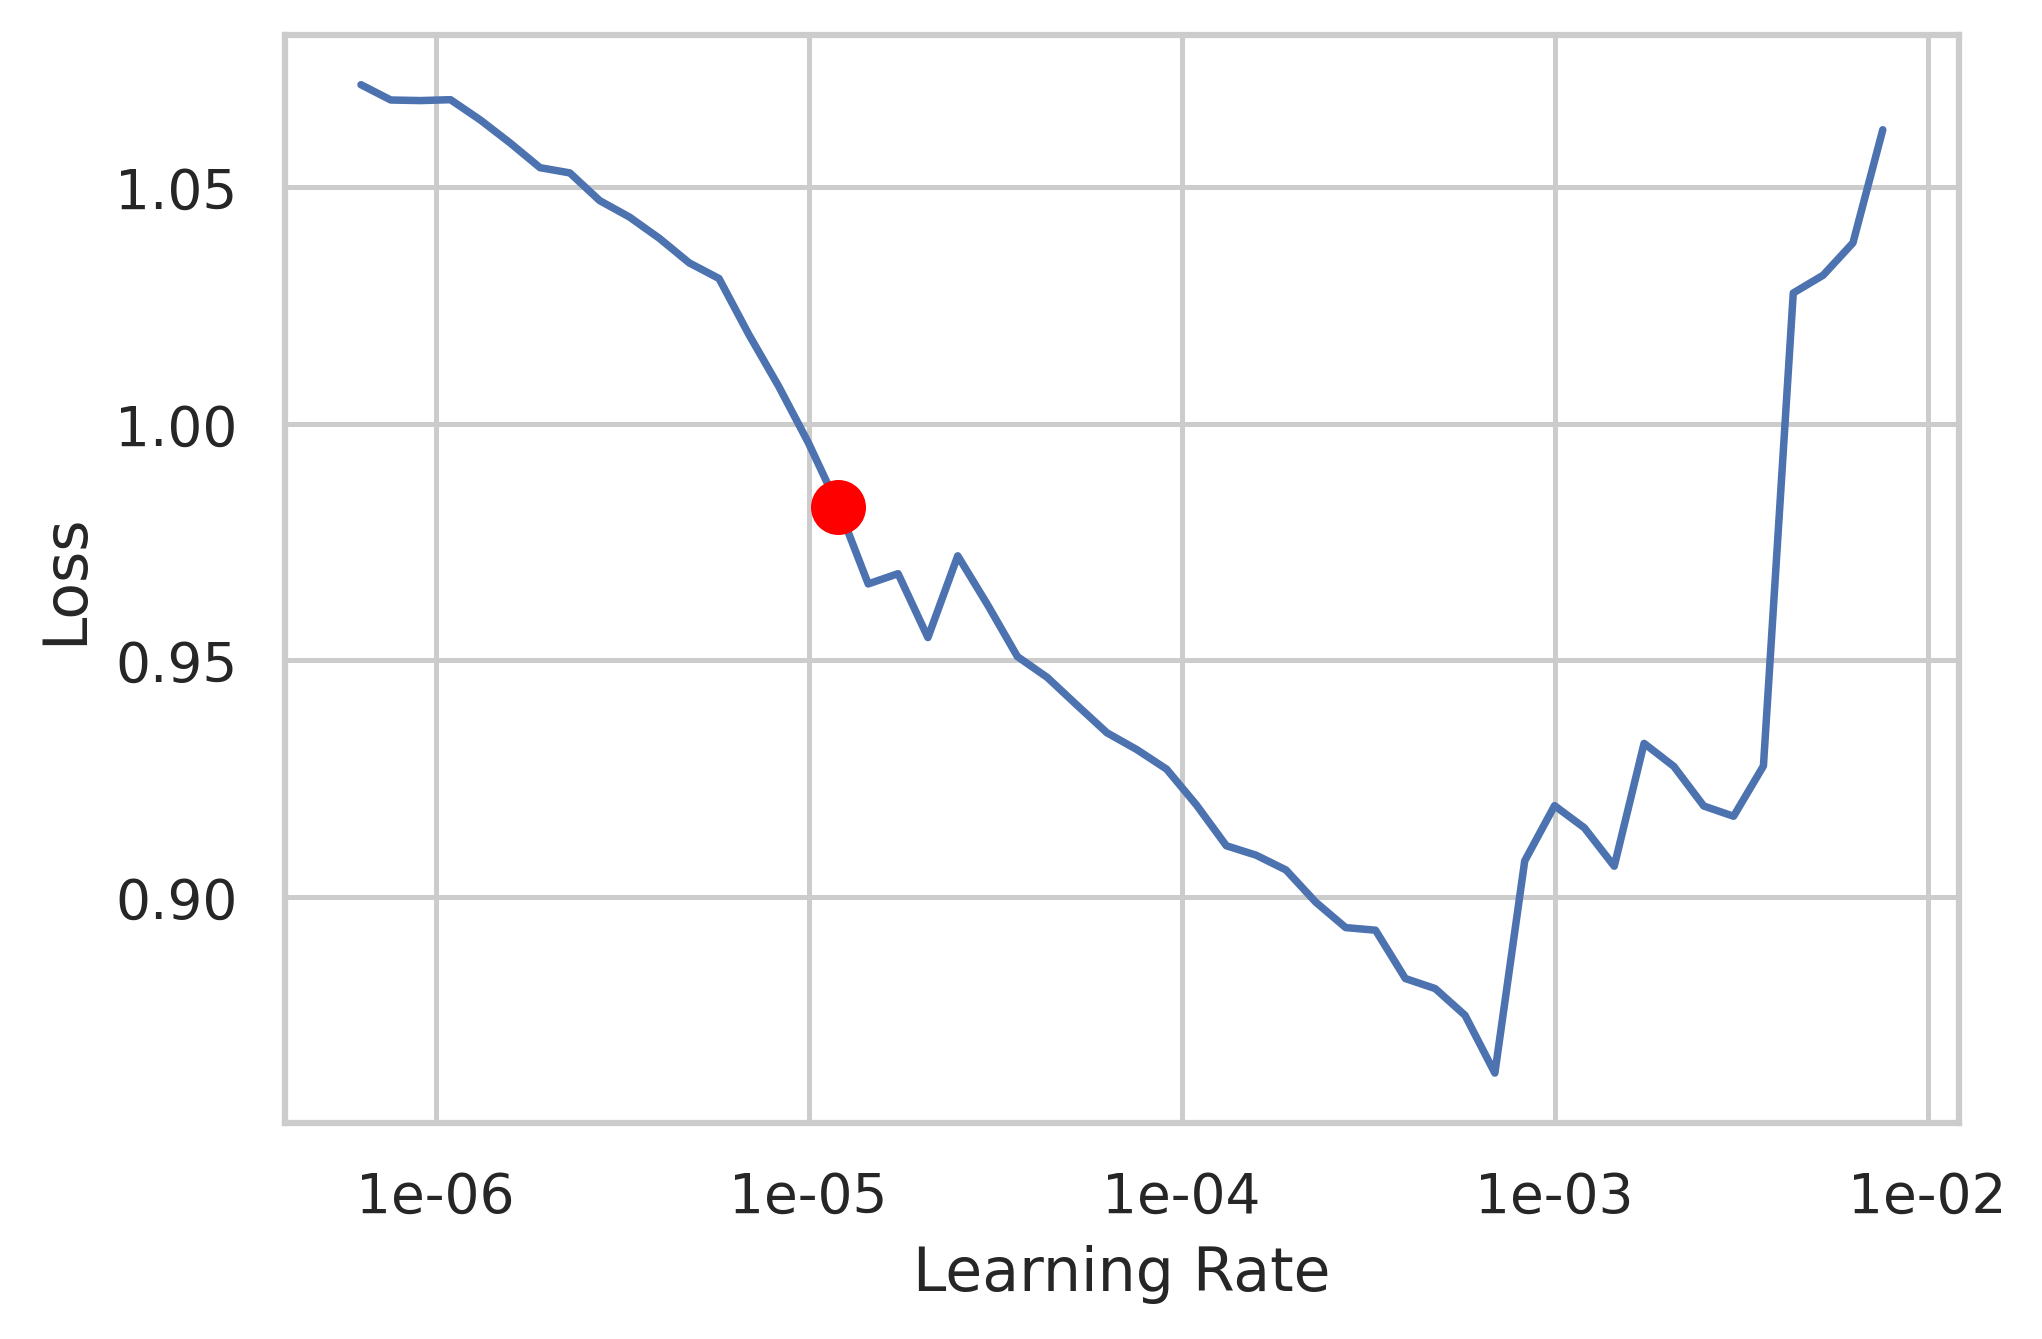

In [ ]:
learner.recorder.plot(skip_end=10,suggestion=True)

I will pick a value a bit before the minimum, where the loss still improves. Here 2x10^-3 seems to be a good value.

Next I will use ``fit_one_cycle`` with the chosen learning rate as the maximum learning rate. 

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.783264,0.680048,0.584444,0.415556,01:16
1,0.689014,0.678817,0.584444,0.415556,01:16


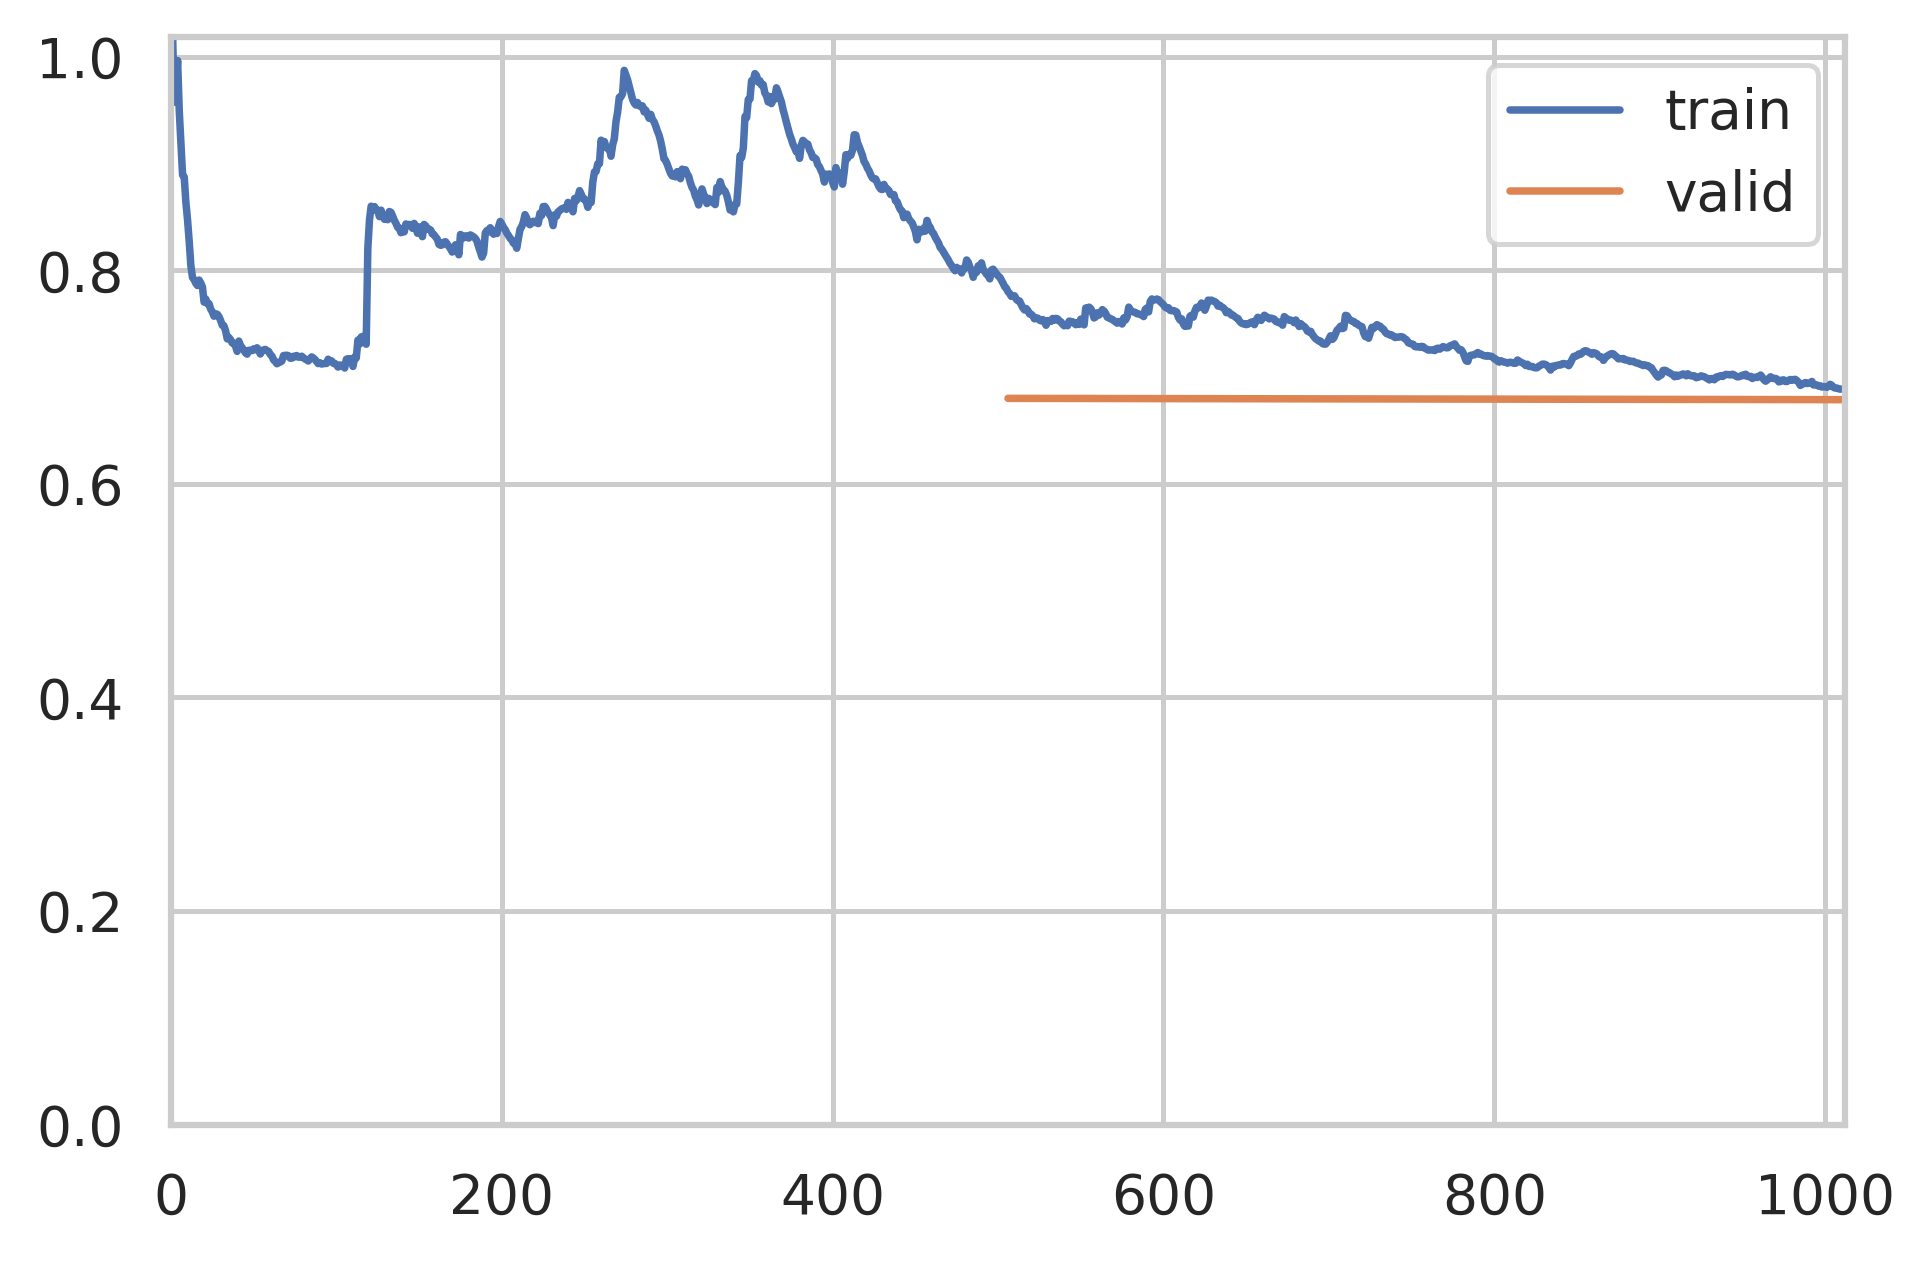

In [ ]:
learner.fit_one_cycle(2,max_lr=2e-03,moms=(0.8,0.7))

As seen, with only 2 epochs, the Roberta Model achieved 77.4% of accuracy, which is not bad.

In [ ]:
#Save the first cicle of training
learner.save('first_cycle')

I then unfreeze the second group of layers and repeat the operations.


In [ ]:
learner.freeze_to(-2)

In [ ]:
# initialise the learning rate
lr = 1e-5

Note here that I use slice to create separate learning rate for each group.

In [ ]:
learner.fit_one_cycle(3, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))

NameError: ignored

As shown, with only 2 epochs, the model achieved more than 78%, which is higher the other classification's models above.

In [ ]:
learner.save('second_cycle')

In [ ]:
seed_all(seed)
learner.load('second_cycle');

In [ ]:
#Freeze the second cicle
learner.freeze_to(-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.473218,0.393511,0.815556,0.184444,00:35
1,0.415552,0.385897,0.815556,0.184444,00:34


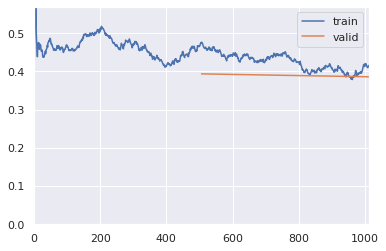

In [ ]:
# train the second cicle on 2 epochs
learner.fit_one_cycle(2, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))

As shown, this time the model achieved more than 80% of accuracy, which is good.

In [ ]:
# save the third cicle
learner.save('third_cycle')

In [ ]:
seed_all(seed)
learner.load('third_cycle');

Here, I unfreeze all the groups.

In [ ]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.388965,0.430646,0.815556,0.184444,01:31
1,0.379607,0.341788,0.853333,0.146667,01:27
2,0.289818,0.362434,0.854444,0.145556,01:36
3,0.216874,0.393493,0.855556,0.144444,01:37
4,0.157246,0.451571,0.860000,0.140000,01:26
5,0.090554,0.458354,0.862222,0.137778,01:29


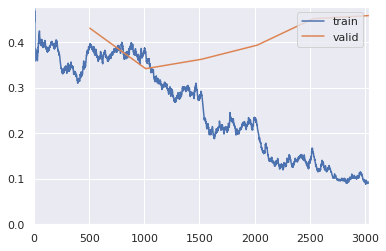

In [ ]:
# let's then train the model on 6 epochs
learner.fit_one_cycle(6, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))


Finally, the model achieved **86.22%** at the last epoch, which is now the best accuracy.

In [ ]:
test.head()


,id,text,HS,TR,AG
0,18201,I swear I’m getting to places just in the nick...,0,0,0
1,18202,I’m an immigrant — and Trump is right on immig...,0,0,0
2,18203,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,0,1
3,18204,@DRUDGE_REPORT We have our own invasion issues...,1,0,1
4,18205,Worker Charged With Sexually Molesting Eight C...,0,0,0


Now, I can predict examples with:

In [ ]:
#learner.predict('This is the best movie of 2020')
learner.predict('@NBCPolitics @MSNBC After 20 days in jail the kids of the illigal refugees must get free. Than nobody should care to them and give them food. The only chance the whole familiy can go home and leave the USA. And sure it must made a supoer big wall to prote')


(Category tensor(1), tensor(1), tensor([5.1795e-03, 9.9481e-01, 7.3758e-06]))

In [ ]:
#learner.predict('This is the best movie of 2020')
learner.predict(train.text[3])


(Category tensor(1), tensor(1), tensor([9.5086e-04, 9.9899e-01, 6.1837e-05]))

In [ ]:
#learner.predict('This is the best movie of 2020')
learner.predict(train.text[4])

(Category tensor(0), tensor(0), tensor([9.8599e-01, 1.4008e-02, 2.7391e-06]))

## 6.5. Creating prediction
Now that the model is trained, I want to generate predictions from the test dataset.

As specified in Keita Kurita's [article](https://mlexplained.com/2019/05/13/a-tutorial-to-fine-tuning-bert-with-fast-ai/), as the function ``get_preds`` does not return elements in order by default, I will have to resort the elements into their correct order.

In [ ]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    """
    the get_preds method does not yield the elements in order by default
    we borrow the code from the RNNLearner to resort the elements into their correct order
    """
    preds = learner.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in databunch.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    return preds[reverse_sampler, :]

test_preds = get_preds_as_nparray(DatasetType.Test)


In [ ]:
test_preds

array([[3.893798e-01, 6.106198e-01, 4.592592e-07],
       [9.994455e-01, 2.194399e-04, 3.350244e-04],
       [3.785255e-01, 6.214743e-01, 2.224972e-07],
       [1.455328e-04, 9.992018e-01, 6.525746e-04],
       ...,
       [5.114277e-03, 9.948743e-01, 1.141013e-05],
       [3.603383e-02, 9.639652e-01, 1.088959e-06],
       [2.215072e-03, 9.976813e-01, 1.035820e-04],
       [8.748182e-03, 9.912470e-01, 4.873554e-06]], dtype=float32)